<a href="https://colab.research.google.com/github/rbbh/ARIMA-SVR-PSO-ensemble/blob/master/30_Experiments_of_ARIMA_%2B_(SVR_%2B_PSO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import svm
from mpl_toolkits.mplot3d import axes3d, Axes3D
from google.colab import files

In [0]:
import io
import pandas as pd

In [3]:
uploaded = files.upload()   

Saving airlines2.txt to airlines2.txt


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['airlines2.txt']))

In [5]:
uploaded = files.upload()

Saving airlines2_ARIMA.txt to airlines2_ARIMA.txt


In [0]:
data_ARIMA = pd.read_csv(io.BytesIO(uploaded['airlines2_ARIMA.txt']))

In [7]:
uploaded = files.upload()

Saving airlines2_r.txt to airlines2_r.txt


In [0]:
data_r = pd.read_csv(io.BytesIO(uploaded['airlines2_r.txt']))

In [9]:
data_r.describe()

Residuo
count  144.000000
mean     2.832599
std     29.757948
min    -86.729834
25%    -15.400285
50%      0.233500
75%     24.658117
max     81.595276

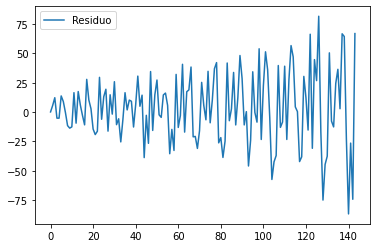

In [10]:
data_r.plot()

In [11]:
len(data)

144

In [0]:
#Scaling the data
from sklearn import preprocessing

data_r_n = data_r.copy()

data_r_n = (data_r - data_r.min())/(data_r.max() - data_r.min())

data_r_n = pd.DataFrame(data_r_n)



In [13]:
# TODO: Create function for the Lag used for the prediction
# We will use 12 for the lag dimension if the series repeats 
# itself annually, 3 if it is trimestrial etc.

# Note: For the "ONS" data base, make "dimensions" = 3
# NOTE: For the "Milk" data base, make "dimensions" = 24

dimensions = 12
data_cn = pd.concat([data_r_n.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_cn)

      Residuo   Residuo   Residuo  ...   Residuo   Residuo   Residuo
0    0.515917       NaN       NaN  ...       NaN       NaN       NaN
1    0.548651  0.515917       NaN  ...       NaN       NaN       NaN
2    0.587900  0.548651  0.515917  ...       NaN       NaN       NaN
3    0.484460  0.587900  0.548651  ...       NaN       NaN       NaN
4    0.484363  0.484460  0.587900  ...       NaN       NaN       NaN
..        ...       ...       ...  ...       ...       ...       ...
139  0.376937  0.897451  0.911189  ...  0.250371  0.070000  0.413713
140  0.000000  0.376937  0.897451  ...  0.292054  0.250371  0.070000
141  0.358242  0.000000  0.376937  ...  0.814766  0.292054  0.250371
142  0.073976  0.358242  0.000000  ...  0.469495  0.814766  0.292054
143  0.912230  0.073976  0.358242  ...  0.440188  0.469495  0.814766

[144 rows x 13 columns]


In [14]:
# Splitting the residual data into train, validation and test

from sklearn.model_selection import train_test_split

X = data_cn.iloc[12:,1:]

y = data_cn.iloc[12:,0]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3939, shuffle = False)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5384, shuffle = False)


print(len(y_val))
print(len(y_test))
print(len(y_train))


24
28
80


In [15]:
dimensions = 12
data_c2n = pd.concat([data_ARIMA.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c2n)

          ARIMA       ARIMA       ARIMA  ...       ARIMA       ARIMA       ARIMA
0    111.888000         NaN         NaN  ...         NaN         NaN         NaN
1    112.378158  111.888000         NaN  ...         NaN         NaN         NaN
2    119.771433  112.378158  111.888000  ...         NaN         NaN         NaN
3    134.183102  119.771433  112.378158  ...         NaN         NaN         NaN
4    126.199377  134.183102  119.771433  ...         NaN         NaN         NaN
..          ...         ...         ...  ...         ...         ...         ...
139  629.281833  557.666302  468.353843  ...  451.586191  537.947070  576.091574
140  594.729834  629.281833  557.666302  ...  399.569768  451.586191  537.947070
141  487.428775  594.729834  629.281833  ...  354.584335  399.569768  451.586191
142  464.277816  487.428775  594.729834  ...  424.702000  354.584335  399.569768
143  365.178562  464.277816  487.428775  ...  403.635172  424.702000  354.584335

[144 rows x 13 columns]


In [16]:
# Splitting the ARIMA predictions into train, validation and test

from sklearn.model_selection import train_test_split

X_ARIMA = data_c2n.iloc[12:,1:]

y_ARIMA = data_c2n.iloc[12:,0]

X_train_ARIMA, X_val_ARIMA, y_train_ARIMA, y_val_ARIMA = train_test_split(X_ARIMA, y_ARIMA, test_size = 0.3939, shuffle = False)

X_val_ARIMA, X_test_ARIMA, y_val_ARIMA, y_test_ARIMA = train_test_split(X_val_ARIMA, y_val_ARIMA, test_size = 0.5384, shuffle = False)

print(len(y_val_ARIMA))
print(len(y_test_ARIMA))
print(len(y_train_ARIMA))

24
28
80


In [17]:
dimensions = 12
data_c3n = pd.concat([data.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c3n)

       X      X      X      X      X  ...      X      X      X      X      X
0    112    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
1    118  112.0    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
2    132  118.0  112.0    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
3    129  132.0  118.0  112.0    NaN  ...    NaN    NaN    NaN    NaN    NaN
4    121  129.0  132.0  118.0  112.0  ...    NaN    NaN    NaN    NaN    NaN
..   ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
139  606  622.0  535.0  472.0  461.0  ...  405.0  362.0  407.0  463.0  559.0
140  508  606.0  622.0  535.0  472.0  ...  417.0  405.0  362.0  407.0  463.0
141  461  508.0  606.0  622.0  535.0  ...  391.0  417.0  405.0  362.0  407.0
142  390  461.0  508.0  606.0  622.0  ...  419.0  391.0  417.0  405.0  362.0
143  432  390.0  461.0  508.0  606.0  ...  461.0  419.0  391.0  417.0  405.0

[144 rows x 13 columns]


In [18]:
# Splitting the raw data into train, validation and test

from sklearn.model_selection import train_test_split

X_raw = data_c3n.iloc[12:,1:]

y_raw = data_c3n.iloc[12:,0]

X_train_raw, X_val_raw, y_train_raw, y_val_raw = train_test_split(X_raw, y_raw, test_size = 0.3939, shuffle = False)

X_val_raw, X_test_raw, y_val_raw, y_test_raw = train_test_split(X_val_raw, y_val_raw, test_size = 0.5384, shuffle = False)

print(len(y_val_raw))
print(len(y_test_raw))
print(len(y_train_raw))

24
28
80


In [0]:
def pso(n_particles, iterations, dimensions, inertia, k_best_particles, experiments):

    # Range of SVR's hyperparameters (Particles' search space)
    # C, Epsilon and Gamma
    max_c = 1e4
    min_c = 1e-3
    max_e = 1e-1
    min_e = 1e-8
    max_g = 1e3
    min_g = 1e-3
    

    # Initializing regression variables    
    p_best_RGS = np.empty((n_particles), dtype = object);
    g_best_RGS = sys.maxsize

    # Initializing variables for experiment collection
    g_bests = []
    g_bests_RGS_experiment = []
    mse_residuals = []
    final_experiment_predictions = []

    last_configurations = []
    
    average_particles = []
    mse_averages = []
    final_experiment_averages = []

    median_particles = []
    mse_medians = []
    final_experiment_medians = []

    average_k_best_predictions = []
    mse_averages_k_best = []
    final_experiment_k_averages = []

    median_k_best_predictions = []
    mse_medians_k_best = []
    final_experiment_k_medians = []
    
    mse_ARIMA = []
    mse_ensemble = []


    from sklearn.metrics import mean_squared_error

    for e in range(experiments):
      
        # Initializing particles' positions randomly, inside
        # the search space
        x = np.random.rand(n_particles, 1)*(max_c - min_c) + min_c
        y = np.random.rand(n_particles, 1)*(max_e - min_e) + min_e
        z = np.random.rand(n_particles, 1)*(max_g - min_g) + min_g

        c = np.concatenate((x,y,z), axis=1)

        if(e == 0):
            # Displaying tridimensional search space
            plot(c)

        # Initializing particles' parameters
        v = np.zeros((n_particles, dimensions))
        c1 = 2
        c2 = 2
        p_best = np.zeros((n_particles, dimensions))
        p_best_val = np.zeros(n_particles) + sys.maxsize  
        g_best = np.zeros(dimensions)
        g_best_val = sys.maxsize

        best_iter = np.zeros(iterations)

        for i in range(iterations):

            for j in range(n_particles):
              
                # Starting Regression
                rgs = svm.SVR(C = c[j][0], epsilon = c[j][1], gamma = c[j][2])

                # Fitting the curve
                rgs.fit(X_train, y_train)
                y_predict = rgs.predict(X_val)

                # Using Mean Squared Error to verify prediction accuracy
                mse = mean_squared_error(y_val, y_predict) 

                # If mse value for that search point, for that particle,
                # is less than its personal best point,
                # replace personal best
                if(mse < p_best_val[j]):   
                    # The value below represents the current least Mean Squared Error
                    p_best_val[j] = mse
                    
                    # The value below represents the current least Regressor
                    p_best_RGS[j] = rgs
                                

                    # The value below represents the current search coordinates for
                    # the particle's current least Mean Squared Error found
                    p_best[j] = c[j].copy()
                    
                # Using auxiliar variable to get the index of the
                # particle that found the configuration with the 
                # minimum MSE value
                aux = np.argmin(p_best_val)        
              
                if(p_best_val[aux] < g_best_val):
                    # Assigning Particle's current best MSE to the Group's best    
                    g_best_val = p_best_val[aux]

                    # Assigning Particle's current best configuration to the Group's best
                    g_best = p_best[aux].copy()

                    # Group best regressor:
                    # the combination of C, Epsilon and Gamma
                    # that computes the best fitting curve
                    g_best_RGS = p_best_RGS[aux]

              
                rand1 = np.random.random()
                rand2 = np.random.random()

                # The variable below influences directly the particle's velocity.
                # It can either make it smaller or bigger. 
                w = inertia

                # The equation below represents Particle's velocity, which is
                # the rate of change in its position
                v[j] = w*v[j] + c1*(p_best[j] - c[j])*rand1 + c2*(g_best - c[j])*rand2

                # Change in the Particle's position 
                c[j] = c[j] + v[j]

                # Below is a series of conditions that stop the particles from
                # leaving the search space
                if(c[j][2] < min_g):
                  c[j][2] = min_g
                if(c[j][2] > max_g):
                  c[j][2] = max_g
                if(c[j][1] < min_e):
                  c[j][1] = min_e
                if(c[j][1] > max_e):
                  c[j][1] = max_e
                if(c[j][0] < min_c):
                  c[j][0] = min_c
                if(c[j][0] > max_c):
                  c[j][0] = max_c
                
        
        # Storing last particles` positions
        # for later use
        last_configurations.append(c)

        # Making the prediction with the best configuration of C, Epsilon and
        # Gamma found by the particles
        predict_test = g_best_RGS.predict(X_test)

        g_bests_RGS_experiment.append(g_best_RGS)
        g_bests.append(g_best)

        mse_r = mean_squared_error(y_test, predict_test)
        mse_residuals.append(mse_r)

    
        # Taking all particles' final predictions,
        # getting their averages and medians and
        # getting the k best subset of particles
        # to see the final prediction without outliers
        k = k_best_particles
        average_p, median_p, av_k_best_p, md_k_best_p = particles_last_predictions(c, n_particles, k)

        average_particles.append(average_p)
        median_particles.append(median_p)
        average_k_best_predictions.append(av_k_best_p)
        median_k_best_predictions.append(md_k_best_p)
        
        mse_e, mse_AR = residual_performance(predict_test, y_test_ARIMA, y_test_raw)

        # Storing the Ensemble's (final system) mse
        mse_ARIMA.append(mse_AR)
        mse_ensemble.append(mse_e)

        # Storing the mse of the average predictions
        mse_A, mse_AR = residual_performance(average_p, y_test_ARIMA, y_test_raw)
        mse_averages.append(mse_A)

        # Storing the mse of the average k best predictions
        mse_A_k_best, mse_AR = residual_performance(av_k_best_p, y_test_ARIMA, y_test_raw)
        mse_averages_k_best.append(mse_A_k_best)

        # Storing the mse of the median predictions
        mse_M, mse_AR = residual_performance(median_p, y_test_ARIMA, y_test_raw)
        mse_medians.append(mse_M)

        # Storing the mse of the median k best predictions
        mse_M_k_best, mse_AR = residual_performance(md_k_best_p, y_test_ARIMA, y_test_raw)
        mse_medians_k_best.append(mse_M_k_best)

        # Getting the final results of the current experiment
        # and storing them
        final_exp_p, final_exp_av, final_exp_md, final_exp_av_k, final_exp_md_k = results(g_best_RGS, average_p, median_p, av_k_best_p, md_k_best_p)

        final_exp_p = final_exp_p.tolist()
        final_exp_av = final_exp_av.tolist()
        final_exp_md = final_exp_md.tolist()
        final_exp_av_k = final_exp_av_k.tolist()
        final_exp_md_k = final_exp_md_k.tolist()

        final_experiment_predictions.append(final_exp_p)
        final_experiment_averages.append(final_exp_av)
        final_experiment_medians.append(final_exp_md)
        final_experiment_k_averages.append(final_exp_av_k)
        final_experiment_k_medians.append(final_exp_md_k)

        print('\nExperiment # %d: done. MSE_g_Best: %f; MSE_AV: %f; MSE_MD: %f; MSE_k_AV: %f; MSE_k_MD: %f\n'%(e+1, mse_e, mse_A, mse_M, mse_A_k_best, mse_M_k_best)) 


    aux_result_1 = np.argmin(mse_ensemble)
    mse_final = mse_ensemble[aux_result_1]

    #print('Debug 1')

    aux_result_2 = np.argmin(mse_residuals)
    best_regression = g_bests_RGS_experiment[aux_result_2]
    best_configuration = g_bests[aux_result_2]

    c = last_configurations[aux_result_2]

    probable_best_predictions = final_experiment_predictions[aux_result_2]

    corresponding_average = final_experiment_averages[aux_result_2]
    corresponding_median = final_experiment_medians[aux_result_2]

    corresponding_k_average = final_experiment_k_averages[aux_result_2]
    corresponding_k_median = final_experiment_k_medians[aux_result_2]

    #print('Debug 2')

    display_results(best_regression, probable_best_predictions, 
                    corresponding_average, corresponding_median,
                    corresponding_k_average, corresponding_k_median,c)

    #print('Debug 3')

    #final_experiment_predictions_T = list(map(list, zip(*final_experiment_predictions)))
    #final_experiment_averages_T = list(map(list, zip(*final_experiment_averages)))
    #final_experiment_medians_T = list(map(list, zip(*final_experiment_medians)))
    #final_experiment_k_averages_T = list(map(list, zip(*final_experiment_k_averages)))
    #final_experiment_k_medians_T = list(map(list, zip(*final_experiment_k_medians)))

    final_experiment_predictions_concat = [item for sublist in final_experiment_predictions for item in sublist] 
    final_experiment_averages_concat = [item for sublist in final_experiment_averages for item in sublist]
    final_experiment_medians_concat = [item for sublist in final_experiment_medians for item in sublist]
    final_experiment_k_averages_concat = [item for sublist in final_experiment_k_averages for item in sublist]
    final_experiment_k_medians_concat = [item for sublist in final_experiment_k_medians for item in sublist]


    print(color.BOLD + '\nBest Result: Experiment # %d . Mean Squared Error = %f\n'%(aux_result_1+1, mse_final) + color.BOLD )  


    pd.options.display.float_format = '${:,.2f}'.format
    final_results = pd.DataFrame()

    
    final_results["Previsoes com o G_Best (Sistema Final)"] = final_experiment_predictions_concat
    final_results["Previsoes com as Medias"] = final_experiment_averages_concat
    final_results["Previsoes com as Medianas"] = final_experiment_medians_concat
    final_results["Previsoes com a Media das K melhores particulas"] = final_experiment_k_averages_concat
    final_results["Previsoes com a Mediana das K melhores particulas"] = final_experiment_k_medians_concat
    
    final_mse = pd.DataFrame()
    
    final_mse["Melhores Configuracoes (G_Bests)"] = g_bests
    final_mse["MSE da Previsao do Sistema Final"] = mse_ensemble
    final_mse["MSE da Previsao das Medias"] = mse_averages
    final_mse["MSE da Previsao das Medianas"] = mse_medians
    final_mse["MSE da Previsao das Medias das K melhores particulas"] = mse_averages_k_best
    final_mse["MSE da Previsao das Medianas das K melhores particulas"] = mse_medians_k_best
    final_mse["MSE da Previsao do ARIMA"] = mse_ARIMA


    final_results.to_csv("Airlines_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_mse.to_csv("MSE_Airlines_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

In [0]:
def display_results(configuration, final_predictions, 
                    final_predictions_average, final_predictions_median, 
                    final_predictions_k_average, final_predictions_k_median, all_particles):

    from sklearn.metrics import mean_squared_error
    
    data = y_test_raw
    ARIMA = y_test_ARIMA

    plot(all_particles)

    mse_ARIMA = mean_squared_error(ARIMA, data)
    mse = mean_squared_error(final_predictions, data)
    mse_A = mean_squared_error(final_predictions_average, data)
    mse_M = mean_squared_error(final_predictions_median, data)
    mse_k_A = mean_squared_error(final_predictions_k_average, data)
    mse_k_M = mean_squared_error(final_predictions_k_median, data)

    print('\nMean Squared Error for the ARIMA Model:\t %f' %mse_ARIMA)
    print('\nBest Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse)
    print('\nMean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_A)
    print('\nMean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_k_A)   
    print('\nMean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_M)
    print('\nMean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_k_M)


    print('\nBest Configuration Found:\n')
    print(configuration)

    print('\n')
    print('\n')
    print(color.BOLD + '\nARIMA Model series` predicitions:\n' + color.BOLD)

    plot_results(ARIMA)  


    print(color.BOLD + '\nEnsemble Model series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions)


    print(color.BOLD + '\nEnsemble Model best Average series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_average)

    
    print(color.BOLD + '\nEnsemble Model K best Average series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_k_average)


    print(color.BOLD + '\nEnsemble Model best Median series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_median)

    
    print(color.BOLD + '\nEnsemble Model K best Median series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_k_median)

    print('\n')
    print('\n')

In [0]:
def results(regression, average, median, k_average, k_median):
    
    import numpy as np

    data = y_test_raw
    ARIMA = y_test_ARIMA
    ARIMA = ARIMA.to_list()
    test = X_test

    average_residuals = average
    median_residuals = median

    k_average_residuals = k_average
    k_median_residuals = k_median
    #print('Debug Inside 1')

    #print(regression)
    
    tmp = regression.predict(test)
    #print('Debug Inside 2')


    residuals = tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_A = average_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_M = median_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_A_k = k_average_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_M_k = k_median_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

    final_predictions = ARIMA + residuals
    final_predictions_average = ARIMA + residuals_A
    final_predictions_median = ARIMA + residuals_M
    final_predictions_average_k = ARIMA + residuals_A_k
    final_predictions_median_k = ARIMA + residuals_M_k
    #print('Debug Inside 3')

    
    return final_predictions, final_predictions_average, final_predictions_median, final_predictions_average_k, final_predictions_median_k


In [0]:
def residual_performance(residual_predictions, ARIMA_predictions, raw_data):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st


    r_tmp = residual_predictions
    ARIMA = ARIMA_predictions
    data = raw_data

    # Un-scalling the residuals
    
    r = r_tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

        
    final_predictions = r + ARIMA
  

    mse1 = mean_squared_error(final_predictions, data)

    mse2 = mean_squared_error(ARIMA, data)
    

    return mse1, mse2

In [0]:
def particles_last_predictions(configurations, particles, k):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st
    
    predictions = []
    mse = []

    for p in range(particles):

        rgs = svm.SVR(C = configurations[p][0], epsilon = configurations[p][1], gamma = configurations[p][2])

        rgs.fit(X_train, y_train) 
        y_predict = rgs.predict(X_test) 

        mse.append(mean_squared_error(y_predict, y_test))
        predictions.append(y_predict)
    
    #print('Debug inside 1')

    total = [sum(x) for x in zip(*predictions)]
    #print('Debug inside 2')  
    
    average = [num/particles for num in total]
    #print('Debug inside 3')

    median = [st.median(num) for num in zip(*predictions)]

    predictions = np.array(predictions)
    id_k = np.argpartition(mse, k)
    k_best_pred = predictions[id_k[:k]]

    k_total = [sum(x) for x in zip(*k_best_pred)]

    av_k_best_pred = [num/k for num in k_total]

    md_k_best_pred = [st.median(num) for num in zip(*k_best_pred)]
    #print('Debug inside 5')


    return average, median, av_k_best_pred, md_k_best_pred

In [0]:
def plot_results(predictions):

    plt.plot(range(len(y_test_raw)), y_test_raw, label='Real')
    plt.plot(range(len(predictions)), predictions, label='Predicted')
    plt.legend()
    plt.show()

In [0]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'



In [0]:
# Function that displays tridimensional plot
def plot(some_list):
 
    ax = Axes3D(plt.figure())
    ax.scatter3D(some_list[:,0], some_list[:,1], some_list[:,2], color = 'g')
    ax.set_xlabel('$C$', fontsize = 20)
    ax.set_ylabel('$\epsilon$', fontsize = 25)
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel('$\gamma$', fontsize=30, rotation = 0)
    ax.zaxis._axinfo['label']['space_factor'] = 1.0
    plt.show()

    print('\n')
    print('\n')

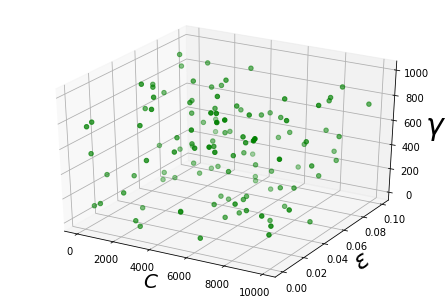






Experiment # 1: done. MSE_g_Best: 791.640532; MSE_AV: 1000.425401; MSE_MD: 846.970520; MSE_k_AV: 771.756871; MSE_k_MD: 781.618234


Experiment # 2: done. MSE_g_Best: 794.019240; MSE_AV: 919.039947; MSE_MD: 832.666361; MSE_k_AV: 780.902745; MSE_k_MD: 787.471512


Experiment # 3: done. MSE_g_Best: 793.712110; MSE_AV: 930.965041; MSE_MD: 806.961592; MSE_k_AV: 778.722644; MSE_k_MD: 781.101349


Experiment # 4: done. MSE_g_Best: 793.840495; MSE_AV: 927.628955; MSE_MD: 838.215710; MSE_k_AV: 780.404999; MSE_k_MD: 779.397409


Experiment # 5: done. MSE_g_Best: 792.256219; MSE_AV: 971.836198; MSE_MD: 831.565200; MSE_k_AV: 782.178708; MSE_k_MD: 781.421785


Experiment # 6: done. MSE_g_Best: 792.840622; MSE_AV: 926.481660; MSE_MD: 839.781303; MSE_k_AV: 778.683842; MSE_k_MD: 785.280863


Experiment # 7: done. MSE_g_Best: 792.806815; MSE_AV: 918.013069; MSE_MD: 821.280770; MSE_k_AV: 777.154063; MSE_k_MD: 775.470998


Experiment # 8: done. MSE_g_Best: 793.107955; MSE_AV: 942.863236; MSE_MD: 862

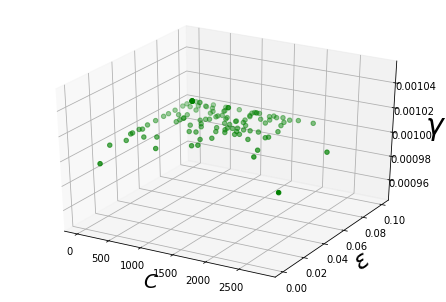






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 791.564563

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 900.919904

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 777.958434

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 830.795756

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 778.049422

Best Configuration Found:

SVR(C=680.8682560173761, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08323542763197182, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



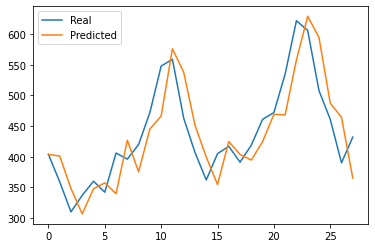


Ensemble Model series` predicitions:



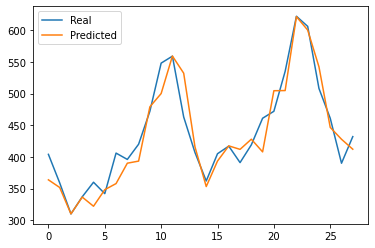


Ensemble Model best Average series` predicitions:



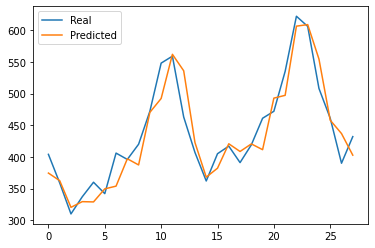


Ensemble Model K best Average series` predicitions:



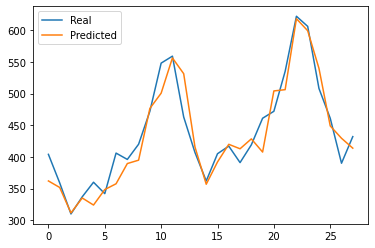


Ensemble Model best Median series` predicitions:



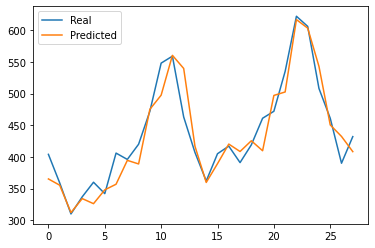


Ensemble Model K best Median series` predicitions:



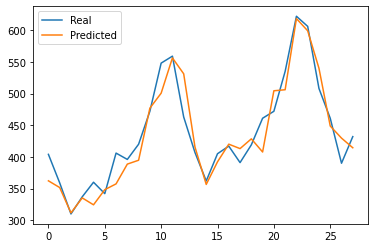






Best Result: Experiment # 18 . Mean Squared Error = 791.564563



In [35]:
pso(120, 100, 3, 1, 5, 30)

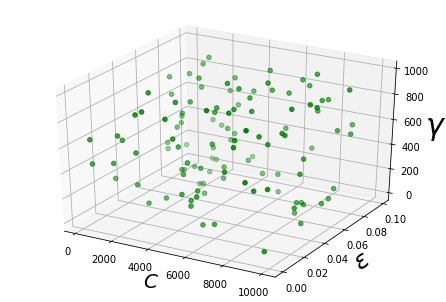






Experiment # 1: done. MSE_g_Best: 795.546877; MSE_AV: 887.824698; MSE_MD: 820.695858; MSE_k_AV: 778.681573; MSE_k_MD: 781.208126


Experiment # 2: done. MSE_g_Best: 794.405457; MSE_AV: 896.978697; MSE_MD: 827.364095; MSE_k_AV: 778.327739; MSE_k_MD: 779.733123


Experiment # 3: done. MSE_g_Best: 856.004319; MSE_AV: 979.435019; MSE_MD: 867.481383; MSE_k_AV: 830.719684; MSE_k_MD: 830.310251


Experiment # 4: done. MSE_g_Best: 795.016478; MSE_AV: 931.675476; MSE_MD: 840.841583; MSE_k_AV: 776.741128; MSE_k_MD: 782.162346


Experiment # 5: done. MSE_g_Best: 795.029743; MSE_AV: 928.199699; MSE_MD: 846.315726; MSE_k_AV: 782.467394; MSE_k_MD: 782.872136


Experiment # 6: done. MSE_g_Best: 791.832684; MSE_AV: 877.661813; MSE_MD: 814.257657; MSE_k_AV: 774.869889; MSE_k_MD: 784.287515


Experiment # 7: done. MSE_g_Best: 794.574539; MSE_AV: 912.790643; MSE_MD: 830.685127; MSE_k_AV: 777.641990; MSE_k_MD: 779.440302


Experiment # 8: done. MSE_g_Best: 795.217807; MSE_AV: 904.389655; MSE_MD: 841.

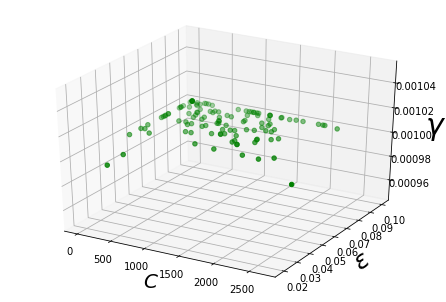






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 791.493053

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 886.272191

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 775.465995

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 828.602130

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 779.375369

Best Configuration Found:

SVR(C=704.4348425583237, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.082562492964324, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



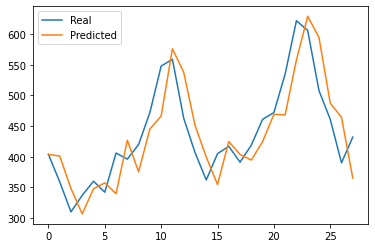


Ensemble Model series` predicitions:



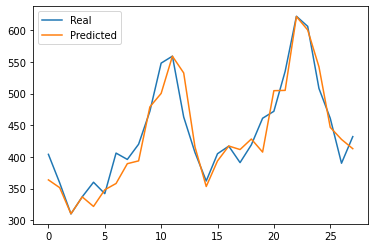


Ensemble Model best Average series` predicitions:



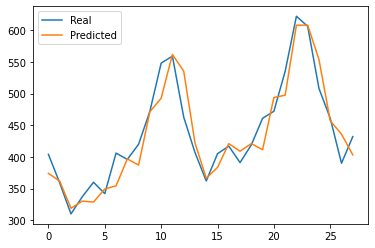


Ensemble Model K best Average series` predicitions:



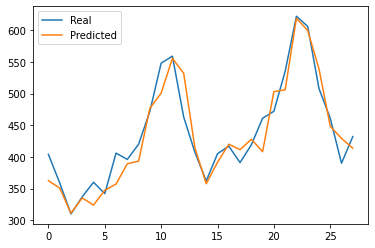


Ensemble Model best Median series` predicitions:



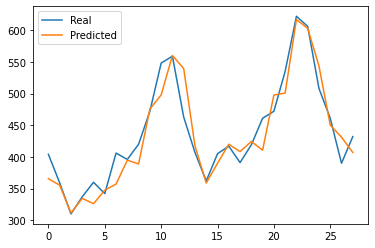


Ensemble Model K best Median series` predicitions:



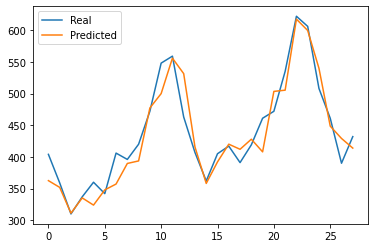






Best Result: Experiment # 13 . Mean Squared Error = 791.493053



In [36]:
pso(120, 100, 3, 1, 10, 30)

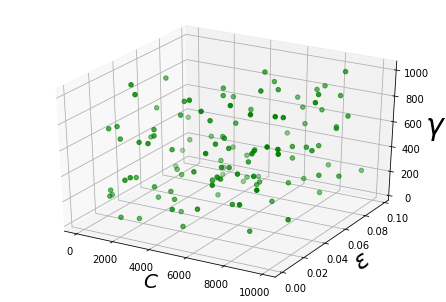






Experiment # 1: done. MSE_g_Best: 794.267167; MSE_AV: 914.807187; MSE_MD: 824.460546; MSE_k_AV: 779.787942; MSE_k_MD: 782.158537


Experiment # 2: done. MSE_g_Best: 876.026393; MSE_AV: 885.784344; MSE_MD: 884.165874; MSE_k_AV: 851.193237; MSE_k_MD: 854.222170


Experiment # 3: done. MSE_g_Best: 793.159317; MSE_AV: 944.614296; MSE_MD: 855.091317; MSE_k_AV: 778.991519; MSE_k_MD: 776.345484


Experiment # 4: done. MSE_g_Best: 796.288211; MSE_AV: 926.986082; MSE_MD: 834.010501; MSE_k_AV: 785.063788; MSE_k_MD: 781.693518


Experiment # 5: done. MSE_g_Best: 795.132410; MSE_AV: 896.108950; MSE_MD: 837.925874; MSE_k_AV: 781.675771; MSE_k_MD: 784.908688


Experiment # 6: done. MSE_g_Best: 795.168138; MSE_AV: 944.029823; MSE_MD: 846.581631; MSE_k_AV: 782.598330; MSE_k_MD: 781.934561


Experiment # 7: done. MSE_g_Best: 791.550806; MSE_AV: 876.691395; MSE_MD: 809.892180; MSE_k_AV: 780.810877; MSE_k_MD: 781.539646


Experiment # 8: done. MSE_g_Best: 794.908929; MSE_AV: 990.369916; MSE_MD: 868.

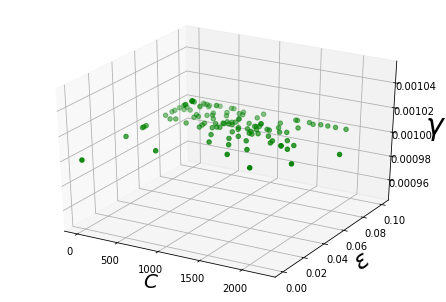






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 791.550806

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 876.691395

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 780.810877

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 809.892180

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 781.539646

Best Configuration Found:

SVR(C=678.7546781700576, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08269634122992812, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



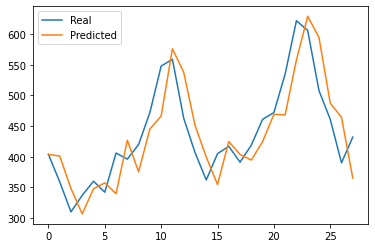


Ensemble Model series` predicitions:



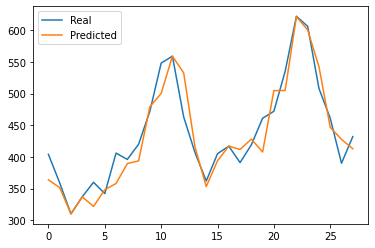


Ensemble Model best Average series` predicitions:



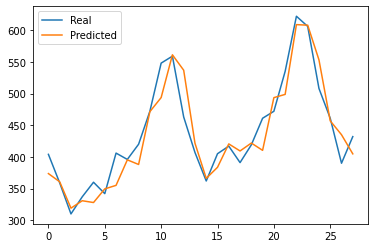


Ensemble Model K best Average series` predicitions:



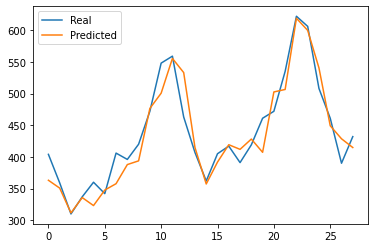


Ensemble Model best Median series` predicitions:



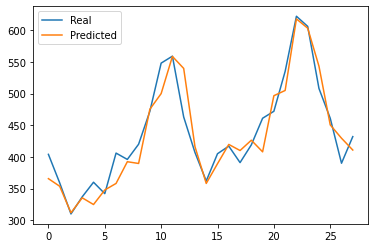


Ensemble Model K best Median series` predicitions:



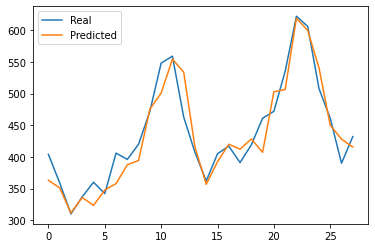






Best Result: Experiment # 7 . Mean Squared Error = 791.550806



In [37]:
pso(120, 100, 3, 1, 20, 30)

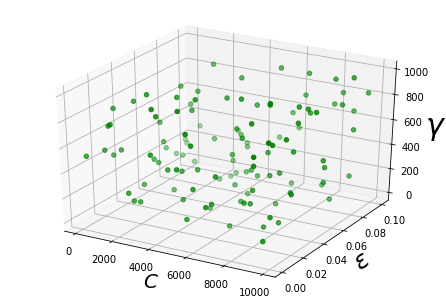






Experiment # 1: done. MSE_g_Best: 795.645390; MSE_AV: 919.371804; MSE_MD: 839.310944; MSE_k_AV: 790.655815; MSE_k_MD: 794.009905


Experiment # 2: done. MSE_g_Best: 794.298004; MSE_AV: 981.807988; MSE_MD: 875.026505; MSE_k_AV: 786.810654; MSE_k_MD: 788.867339


Experiment # 3: done. MSE_g_Best: 793.456580; MSE_AV: 908.280469; MSE_MD: 827.782160; MSE_k_AV: 780.686230; MSE_k_MD: 779.941160


Experiment # 4: done. MSE_g_Best: 793.924761; MSE_AV: 898.561512; MSE_MD: 825.957053; MSE_k_AV: 779.838780; MSE_k_MD: 787.168129


Experiment # 5: done. MSE_g_Best: 793.135003; MSE_AV: 896.263287; MSE_MD: 812.672364; MSE_k_AV: 783.842228; MSE_k_MD: 785.690992


Experiment # 6: done. MSE_g_Best: 793.482792; MSE_AV: 907.692937; MSE_MD: 817.664745; MSE_k_AV: 789.019551; MSE_k_MD: 792.875988


Experiment # 7: done. MSE_g_Best: 793.330687; MSE_AV: 892.067067; MSE_MD: 836.620466; MSE_k_AV: 783.644943; MSE_k_MD: 782.720878


Experiment # 8: done. MSE_g_Best: 794.173304; MSE_AV: 878.126455; MSE_MD: 819.

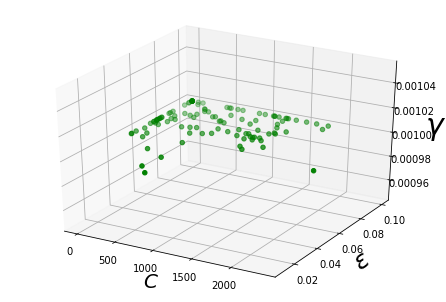






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 792.100678

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 986.807930

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 785.666944

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 865.541608

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 785.958740

Best Configuration Found:

SVR(C=693.18398328922, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08299320031679558, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



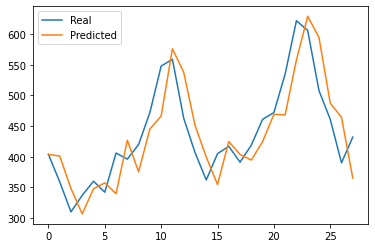


Ensemble Model series` predicitions:



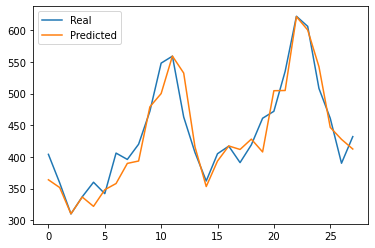


Ensemble Model best Average series` predicitions:



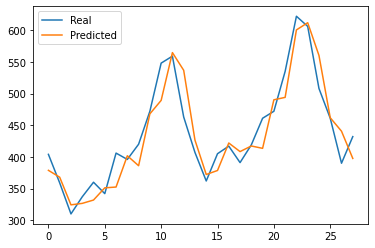


Ensemble Model K best Average series` predicitions:



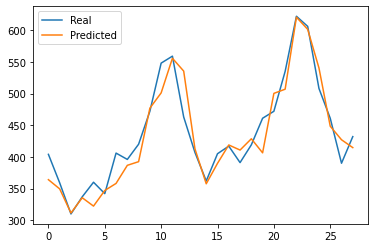


Ensemble Model best Median series` predicitions:



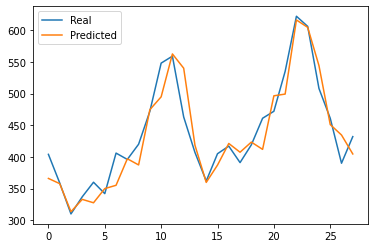


Ensemble Model K best Median series` predicitions:



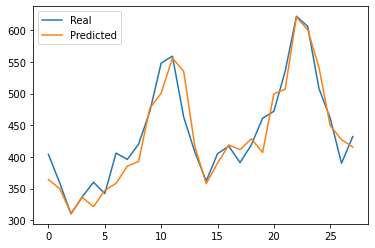






Best Result: Experiment # 16 . Mean Squared Error = 792.100678



In [38]:
pso(120, 100, 3, 1, 30, 30)

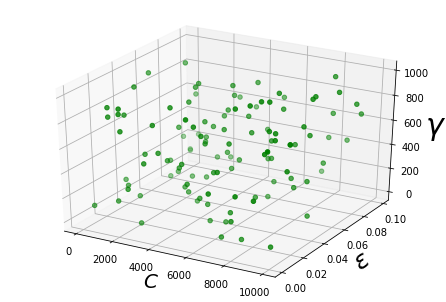






Experiment # 1: done. MSE_g_Best: 795.438830; MSE_AV: 917.899725; MSE_MD: 815.430192; MSE_k_AV: 787.891481; MSE_k_MD: 789.245633


Experiment # 2: done. MSE_g_Best: 796.106968; MSE_AV: 895.196550; MSE_MD: 832.581392; MSE_k_AV: 786.792476; MSE_k_MD: 783.985834


Experiment # 3: done. MSE_g_Best: 794.164603; MSE_AV: 881.973530; MSE_MD: 820.165561; MSE_k_AV: 789.824870; MSE_k_MD: 794.133833


Experiment # 4: done. MSE_g_Best: 795.212727; MSE_AV: 888.348529; MSE_MD: 827.823367; MSE_k_AV: 788.281370; MSE_k_MD: 790.030754


Experiment # 5: done. MSE_g_Best: 791.995208; MSE_AV: 926.747220; MSE_MD: 860.676890; MSE_k_AV: 791.132822; MSE_k_MD: 790.009549


Experiment # 6: done. MSE_g_Best: 793.679015; MSE_AV: 882.037130; MSE_MD: 812.794015; MSE_k_AV: 789.023255; MSE_k_MD: 792.281449


Experiment # 7: done. MSE_g_Best: 795.615118; MSE_AV: 878.461788; MSE_MD: 815.861411; MSE_k_AV: 783.615530; MSE_k_MD: 784.954166


Experiment # 8: done. MSE_g_Best: 792.970885; MSE_AV: 906.557382; MSE_MD: 813.

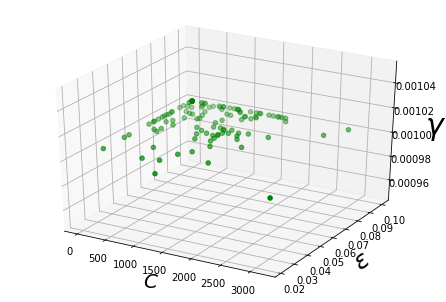






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 791.995208

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 926.747220

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 791.132822

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 860.676890

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 790.009549

Best Configuration Found:

SVR(C=637.9607255173834, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08298069178162341, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



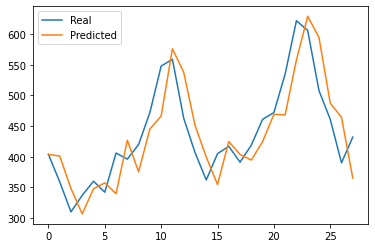


Ensemble Model series` predicitions:



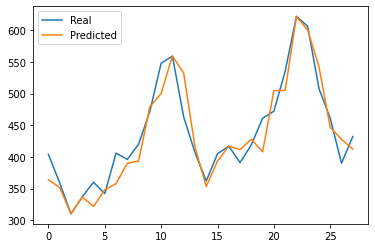


Ensemble Model best Average series` predicitions:



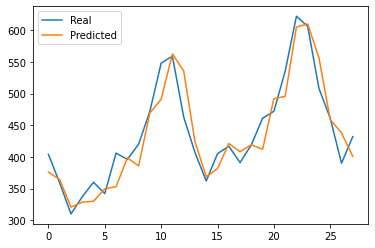


Ensemble Model K best Average series` predicitions:



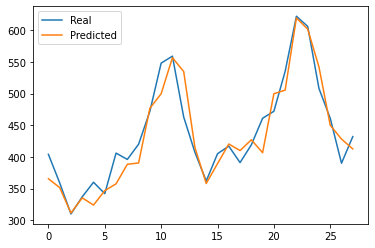


Ensemble Model best Median series` predicitions:



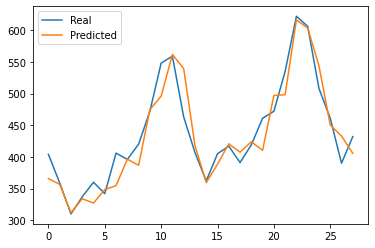


Ensemble Model K best Median series` predicitions:



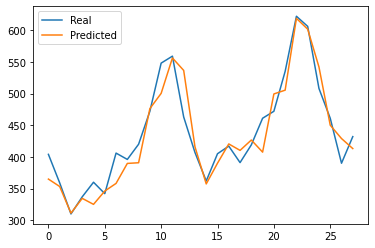






Best Result: Experiment # 5 . Mean Squared Error = 791.995208



In [39]:
pso(120, 100, 3, 1, 40, 30)

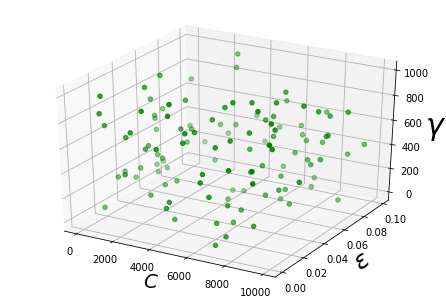






Experiment # 1: done. MSE_g_Best: 793.408976; MSE_AV: 900.921276; MSE_MD: 837.251093; MSE_k_AV: 787.502781; MSE_k_MD: 788.163346


Experiment # 2: done. MSE_g_Best: 793.932196; MSE_AV: 968.899788; MSE_MD: 839.042258; MSE_k_AV: 789.342487; MSE_k_MD: 785.249461


Experiment # 3: done. MSE_g_Best: 794.717102; MSE_AV: 921.372901; MSE_MD: 829.460315; MSE_k_AV: 790.160022; MSE_k_MD: 789.828617


Experiment # 4: done. MSE_g_Best: 794.790427; MSE_AV: 933.152447; MSE_MD: 836.723858; MSE_k_AV: 795.411716; MSE_k_MD: 799.584273


Experiment # 5: done. MSE_g_Best: 792.933247; MSE_AV: 911.447375; MSE_MD: 833.078851; MSE_k_AV: 792.600901; MSE_k_MD: 792.375389


Experiment # 6: done. MSE_g_Best: 792.367702; MSE_AV: 935.064375; MSE_MD: 827.904149; MSE_k_AV: 791.897856; MSE_k_MD: 794.729259


Experiment # 7: done. MSE_g_Best: 793.060767; MSE_AV: 944.947287; MSE_MD: 844.825114; MSE_k_AV: 790.990434; MSE_k_MD: 786.905734


Experiment # 8: done. MSE_g_Best: 793.758788; MSE_AV: 912.011847; MSE_MD: 821.

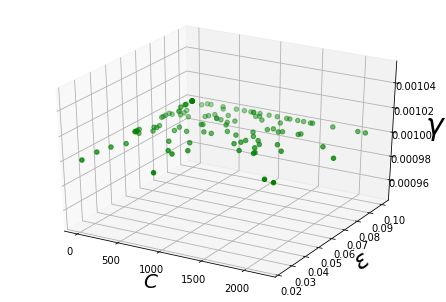






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 791.865316

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 959.843504

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 790.996705

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 861.843365

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 777.787049

Best Configuration Found:

SVR(C=701.5207300089264, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08261233699296569, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



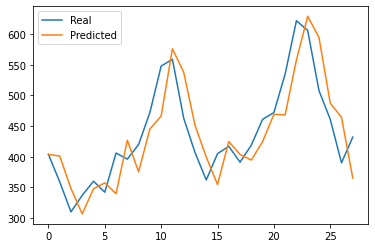


Ensemble Model series` predicitions:



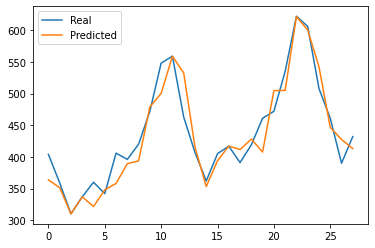


Ensemble Model best Average series` predicitions:



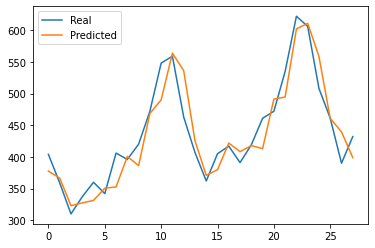


Ensemble Model K best Average series` predicitions:



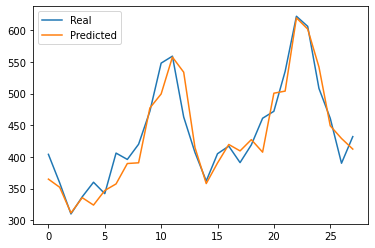


Ensemble Model best Median series` predicitions:



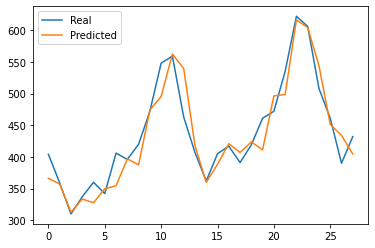


Ensemble Model K best Median series` predicitions:



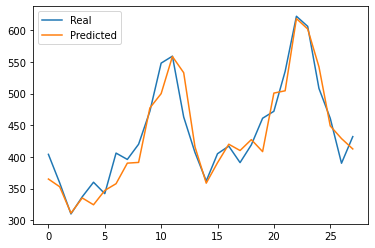






Best Result: Experiment # 24 . Mean Squared Error = 791.865316



In [40]:
pso(120, 100, 3, 1, 50, 30)

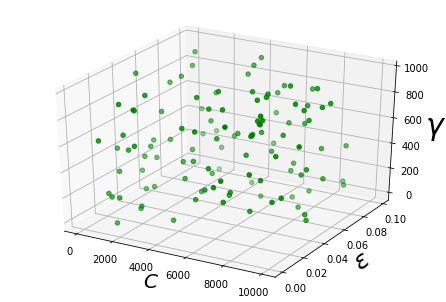






Experiment # 1: done. MSE_g_Best: 792.929514; MSE_AV: 926.084270; MSE_MD: 815.320098; MSE_k_AV: 791.634603; MSE_k_MD: 799.734683


Experiment # 2: done. MSE_g_Best: 794.596884; MSE_AV: 957.987422; MSE_MD: 852.330056; MSE_k_AV: 796.275606; MSE_k_MD: 788.787890


Experiment # 3: done. MSE_g_Best: 794.524785; MSE_AV: 933.298958; MSE_MD: 836.998292; MSE_k_AV: 793.212029; MSE_k_MD: 779.822073


Experiment # 4: done. MSE_g_Best: 793.392719; MSE_AV: 900.885218; MSE_MD: 830.243736; MSE_k_AV: 788.698618; MSE_k_MD: 780.282770


Experiment # 5: done. MSE_g_Best: 794.017099; MSE_AV: 890.071543; MSE_MD: 827.033272; MSE_k_AV: 795.356041; MSE_k_MD: 789.514151


Experiment # 6: done. MSE_g_Best: 794.002329; MSE_AV: 881.585904; MSE_MD: 824.725944; MSE_k_AV: 792.845673; MSE_k_MD: 781.216839


Experiment # 7: done. MSE_g_Best: 792.448382; MSE_AV: 907.703806; MSE_MD: 822.589059; MSE_k_AV: 795.986286; MSE_k_MD: 792.552778


Experiment # 8: done. MSE_g_Best: 793.642011; MSE_AV: 932.151439; MSE_MD: 825.

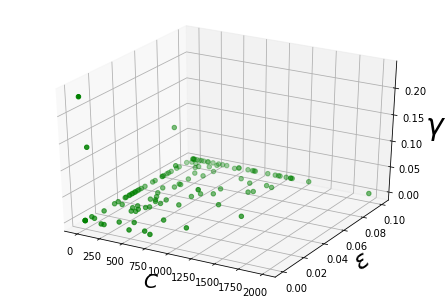






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 745.719122

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 988.060852

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 780.139083

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 884.325107

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 771.968219

Best Configuration Found:

SVR(C=26.477349478846378, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.04819447965881596, gamma=0.0925535475996812, kernel='rbf',
    max_iter=-1, shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



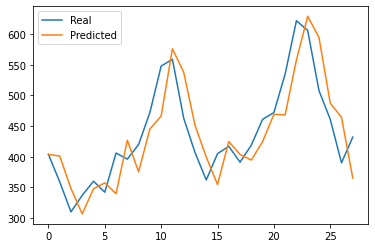


Ensemble Model series` predicitions:



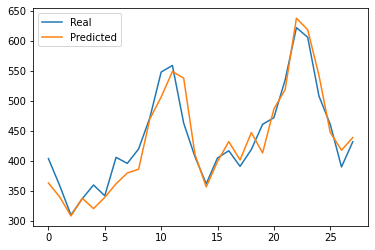


Ensemble Model best Average series` predicitions:



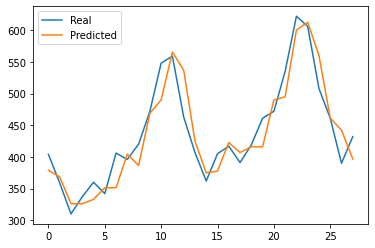


Ensemble Model K best Average series` predicitions:



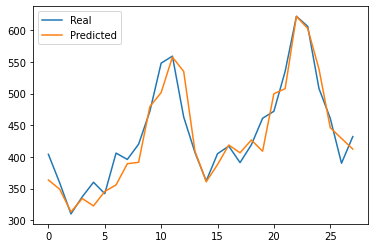


Ensemble Model best Median series` predicitions:



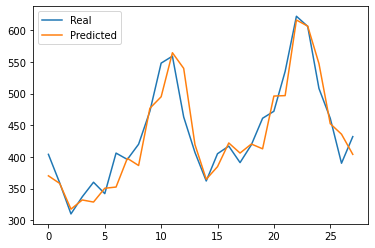


Ensemble Model K best Median series` predicitions:



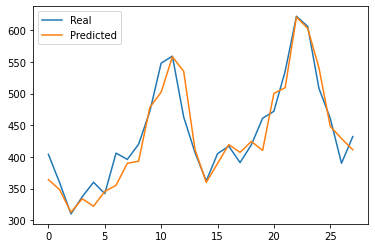






Best Result: Experiment # 19 . Mean Squared Error = 745.719122



In [41]:
pso(120, 100, 3, 1, 60, 30)

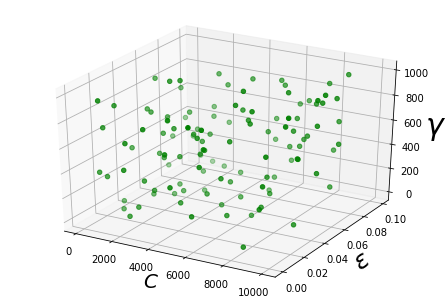






Experiment # 1: done. MSE_g_Best: 794.418391; MSE_AV: 800.933885; MSE_MD: 794.329538; MSE_k_AV: 780.484651; MSE_k_MD: 781.949006


Experiment # 2: done. MSE_g_Best: 793.773165; MSE_AV: 808.462674; MSE_MD: 793.456760; MSE_k_AV: 780.232682; MSE_k_MD: 782.700898


Experiment # 3: done. MSE_g_Best: 876.241454; MSE_AV: 876.757040; MSE_MD: 876.373802; MSE_k_AV: 855.731095; MSE_k_MD: 856.154135


Experiment # 4: done. MSE_g_Best: 794.406048; MSE_AV: 802.438184; MSE_MD: 793.913872; MSE_k_AV: 778.283078; MSE_k_MD: 778.481364


Experiment # 5: done. MSE_g_Best: 792.618201; MSE_AV: 797.643968; MSE_MD: 793.064801; MSE_k_AV: 777.250646; MSE_k_MD: 784.698476


Experiment # 6: done. MSE_g_Best: 793.498382; MSE_AV: 800.427787; MSE_MD: 793.527031; MSE_k_AV: 777.433752; MSE_k_MD: 776.471586


Experiment # 7: done. MSE_g_Best: 792.660946; MSE_AV: 796.864050; MSE_MD: 792.985709; MSE_k_AV: 774.330885; MSE_k_MD: 778.943592


Experiment # 8: done. MSE_g_Best: 793.435338; MSE_AV: 802.005784; MSE_MD: 793.

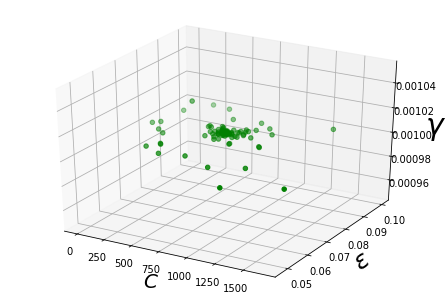






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 792.222233

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 799.042512

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 777.637854

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 793.985056

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 776.506466

Best Configuration Found:

SVR(C=645.0014947533447, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08242155565858997, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



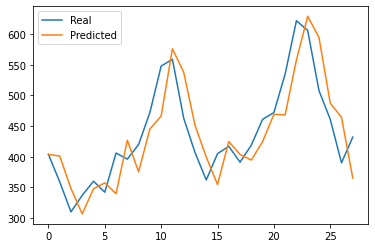


Ensemble Model series` predicitions:



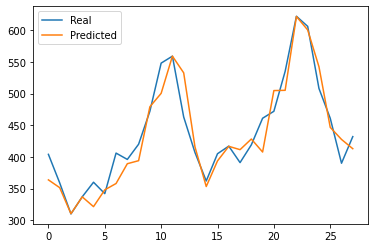


Ensemble Model best Average series` predicitions:



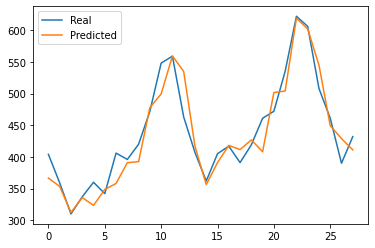


Ensemble Model K best Average series` predicitions:



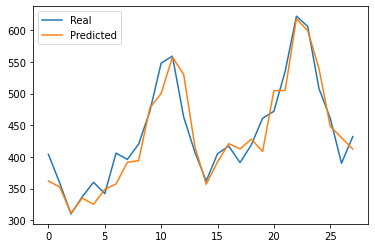


Ensemble Model best Median series` predicitions:



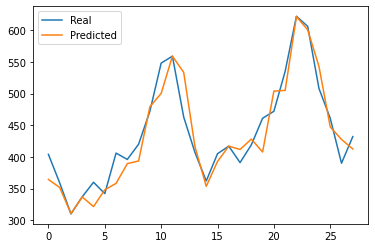


Ensemble Model K best Median series` predicitions:



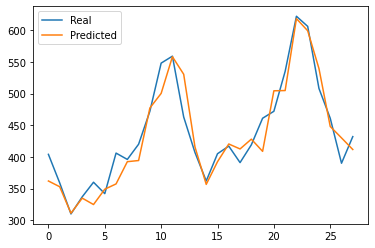






Best Result: Experiment # 9 . Mean Squared Error = 792.222233



In [100]:
pso(120, 100, 3, 0.8, 5, 30)

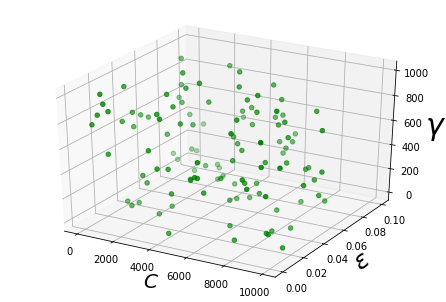






Experiment # 1: done. MSE_g_Best: 792.543950; MSE_AV: 796.252010; MSE_MD: 792.249916; MSE_k_AV: 775.194579; MSE_k_MD: 777.239842


Experiment # 2: done. MSE_g_Best: 793.933965; MSE_AV: 803.893923; MSE_MD: 793.427149; MSE_k_AV: 784.903252; MSE_k_MD: 788.941986


Experiment # 3: done. MSE_g_Best: 795.255284; MSE_AV: 801.406494; MSE_MD: 793.607291; MSE_k_AV: 780.920650; MSE_k_MD: 783.460525


Experiment # 4: done. MSE_g_Best: 794.645348; MSE_AV: 799.787200; MSE_MD: 794.006842; MSE_k_AV: 781.616693; MSE_k_MD: 786.647118


Experiment # 5: done. MSE_g_Best: 794.234620; MSE_AV: 804.795665; MSE_MD: 793.723427; MSE_k_AV: 781.879932; MSE_k_MD: 780.568256


Experiment # 6: done. MSE_g_Best: 793.529176; MSE_AV: 800.891079; MSE_MD: 794.162011; MSE_k_AV: 782.841507; MSE_k_MD: 784.314705


Experiment # 7: done. MSE_g_Best: 793.047875; MSE_AV: 801.903967; MSE_MD: 791.368556; MSE_k_AV: 779.090617; MSE_k_MD: 779.821610


Experiment # 8: done. MSE_g_Best: 793.561438; MSE_AV: 802.492434; MSE_MD: 793.

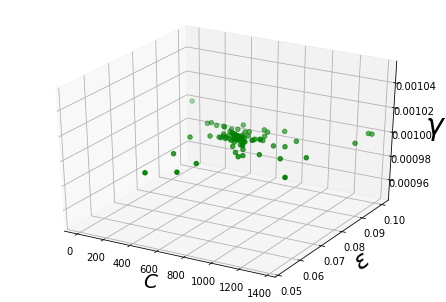






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 792.296405

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 793.241576

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 780.311820

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 793.234833

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 779.861618

Best Configuration Found:

SVR(C=639.9871951445198, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08266300911393998, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



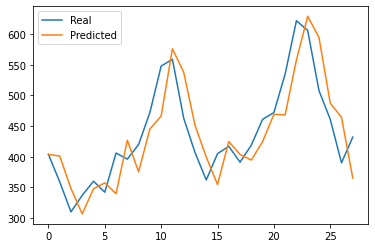


Ensemble Model series` predicitions:



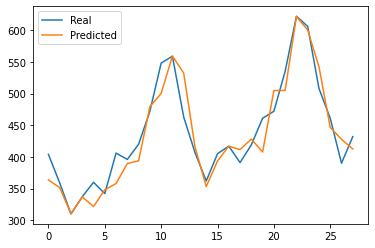


Ensemble Model best Average series` predicitions:



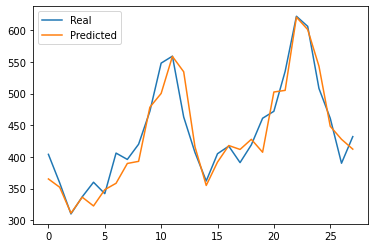


Ensemble Model K best Average series` predicitions:



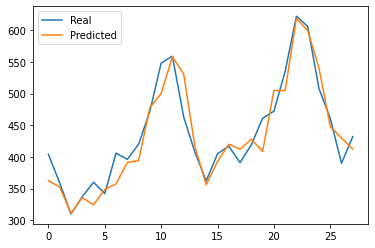


Ensemble Model best Median series` predicitions:



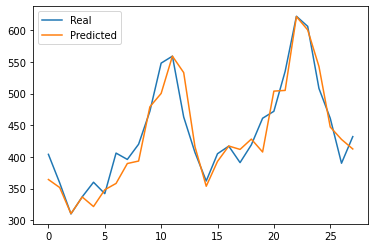


Ensemble Model K best Median series` predicitions:



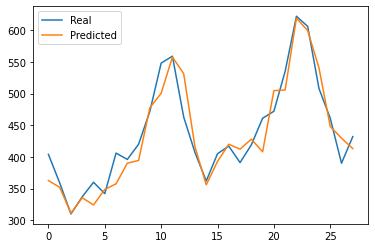






Best Result: Experiment # 14 . Mean Squared Error = 792.296405



In [101]:
pso(120, 100, 3, 0.8, 10, 30)

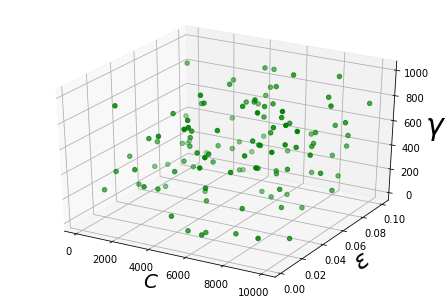






Experiment # 1: done. MSE_g_Best: 792.889752; MSE_AV: 798.728635; MSE_MD: 791.400177; MSE_k_AV: 784.479337; MSE_k_MD: 784.348494


Experiment # 2: done. MSE_g_Best: 793.228633; MSE_AV: 799.296594; MSE_MD: 794.112804; MSE_k_AV: 783.641703; MSE_k_MD: 785.045041


Experiment # 3: done. MSE_g_Best: 792.912770; MSE_AV: 806.640522; MSE_MD: 794.297513; MSE_k_AV: 785.768079; MSE_k_MD: 789.103136


Experiment # 4: done. MSE_g_Best: 794.004230; MSE_AV: 798.138714; MSE_MD: 793.765238; MSE_k_AV: 782.775963; MSE_k_MD: 788.343240


Experiment # 5: done. MSE_g_Best: 794.665348; MSE_AV: 800.468304; MSE_MD: 793.801790; MSE_k_AV: 785.942624; MSE_k_MD: 789.119265


Experiment # 6: done. MSE_g_Best: 875.842445; MSE_AV: 878.590432; MSE_MD: 876.234375; MSE_k_AV: 862.138596; MSE_k_MD: 869.273656


Experiment # 7: done. MSE_g_Best: 792.581087; MSE_AV: 798.761567; MSE_MD: 792.999173; MSE_k_AV: 780.216059; MSE_k_MD: 784.291376


Experiment # 8: done. MSE_g_Best: 793.972035; MSE_AV: 792.971900; MSE_MD: 793.

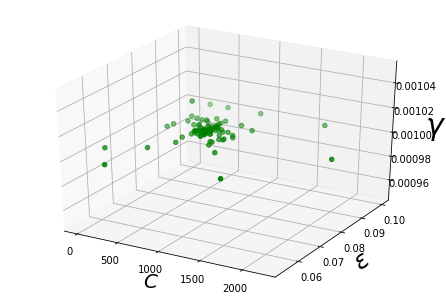






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 792.534707

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 797.407882

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 781.159483

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 792.322621

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 783.276630

Best Configuration Found:

SVR(C=645.3411937929633, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08297883342779967, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



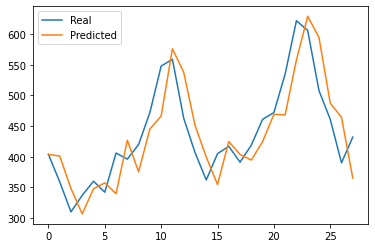


Ensemble Model series` predicitions:



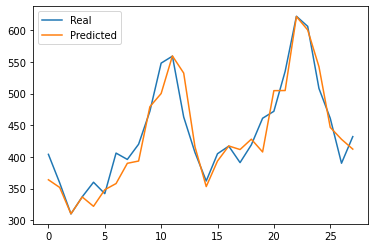


Ensemble Model best Average series` predicitions:



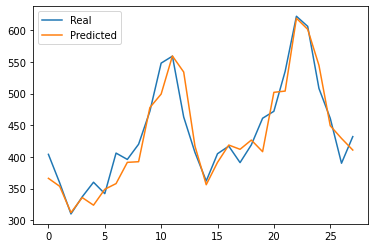


Ensemble Model K best Average series` predicitions:



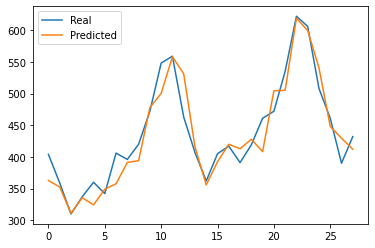


Ensemble Model best Median series` predicitions:



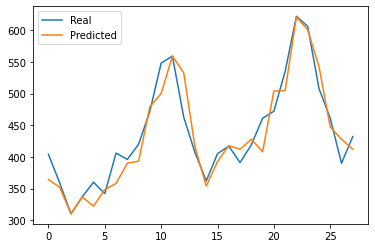


Ensemble Model K best Median series` predicitions:



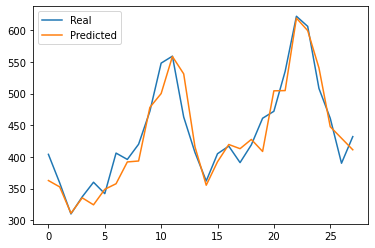






Best Result: Experiment # 18 . Mean Squared Error = 792.534707



In [102]:
pso(120, 100, 3, 0.8, 20, 30)

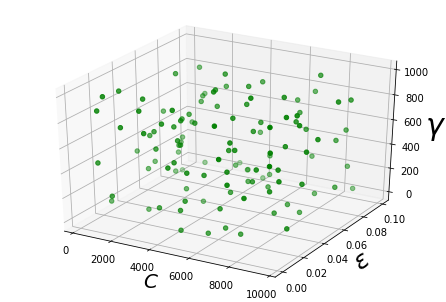






Experiment # 1: done. MSE_g_Best: 795.578984; MSE_AV: 801.732845; MSE_MD: 791.670937; MSE_k_AV: 788.137252; MSE_k_MD: 792.715557


Experiment # 2: done. MSE_g_Best: 795.589189; MSE_AV: 799.430810; MSE_MD: 793.684661; MSE_k_AV: 786.318515; MSE_k_MD: 790.816355


Experiment # 3: done. MSE_g_Best: 793.813489; MSE_AV: 799.189661; MSE_MD: 792.052572; MSE_k_AV: 785.569952; MSE_k_MD: 789.484380


Experiment # 4: done. MSE_g_Best: 793.648688; MSE_AV: 803.277076; MSE_MD: 793.831987; MSE_k_AV: 786.300924; MSE_k_MD: 791.313987


Experiment # 5: done. MSE_g_Best: 793.115427; MSE_AV: 796.403468; MSE_MD: 793.234956; MSE_k_AV: 784.845208; MSE_k_MD: 788.687214


Experiment # 6: done. MSE_g_Best: 791.989253; MSE_AV: 794.972471; MSE_MD: 794.875715; MSE_k_AV: 784.561201; MSE_k_MD: 784.987721


Experiment # 7: done. MSE_g_Best: 794.340745; MSE_AV: 808.384993; MSE_MD: 792.281577; MSE_k_AV: 783.807376; MSE_k_MD: 785.630356


Experiment # 8: done. MSE_g_Best: 793.088769; MSE_AV: 802.390328; MSE_MD: 794.

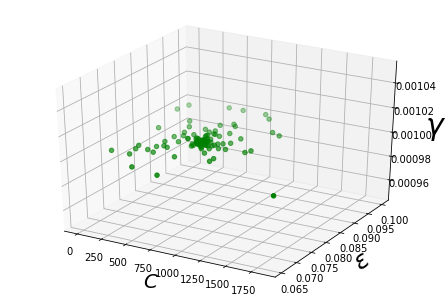






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 791.989253

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 794.972471

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 784.561201

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 794.875715

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 784.987721

Best Configuration Found:

SVR(C=647.0365662070246, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08283619961089168, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



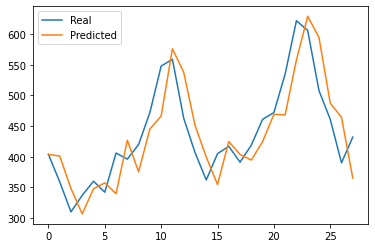


Ensemble Model series` predicitions:



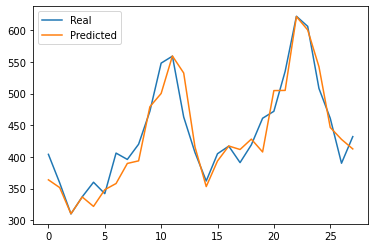


Ensemble Model best Average series` predicitions:



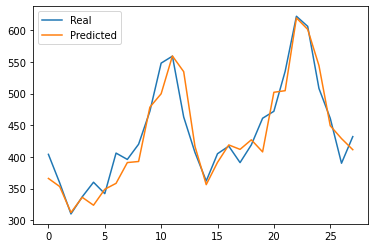


Ensemble Model K best Average series` predicitions:



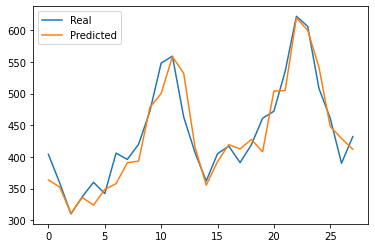


Ensemble Model best Median series` predicitions:



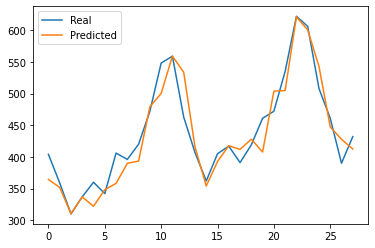


Ensemble Model K best Median series` predicitions:



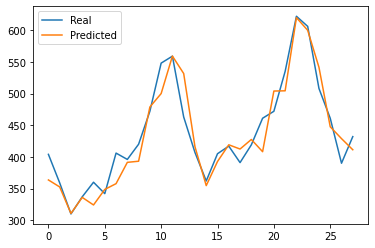






Best Result: Experiment # 6 . Mean Squared Error = 791.989253



In [103]:
pso(120, 100, 3, 0.8, 30, 30)

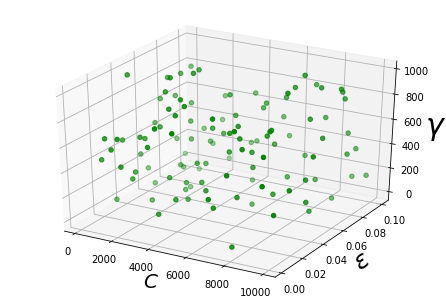






Experiment # 1: done. MSE_g_Best: 792.819884; MSE_AV: 801.518053; MSE_MD: 792.722987; MSE_k_AV: 785.525203; MSE_k_MD: 792.065596


Experiment # 2: done. MSE_g_Best: 793.886339; MSE_AV: 796.446855; MSE_MD: 794.277737; MSE_k_AV: 786.881271; MSE_k_MD: 792.325827


Experiment # 3: done. MSE_g_Best: 794.004964; MSE_AV: 795.674307; MSE_MD: 793.542201; MSE_k_AV: 787.729921; MSE_k_MD: 792.621138


Experiment # 4: done. MSE_g_Best: 793.404743; MSE_AV: 798.388894; MSE_MD: 793.391393; MSE_k_AV: 788.404086; MSE_k_MD: 791.333916


Experiment # 5: done. MSE_g_Best: 793.862100; MSE_AV: 797.779705; MSE_MD: 793.640129; MSE_k_AV: 788.969360; MSE_k_MD: 792.378353


Experiment # 6: done. MSE_g_Best: 792.998837; MSE_AV: 803.062632; MSE_MD: 792.335359; MSE_k_AV: 786.995029; MSE_k_MD: 791.270090


Experiment # 7: done. MSE_g_Best: 794.046438; MSE_AV: 801.310665; MSE_MD: 793.625612; MSE_k_AV: 788.374392; MSE_k_MD: 791.018285


Experiment # 8: done. MSE_g_Best: 794.840709; MSE_AV: 803.075511; MSE_MD: 793.

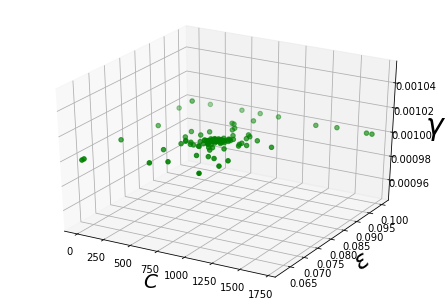






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 791.160566

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 804.079223

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 784.505210

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 790.742167

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 786.388650

Best Configuration Found:

SVR(C=692.5733205298642, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08309399874856337, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



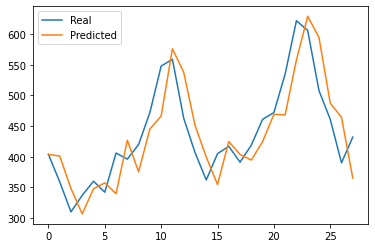


Ensemble Model series` predicitions:



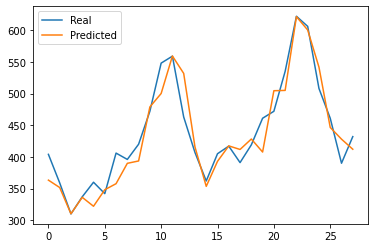


Ensemble Model best Average series` predicitions:



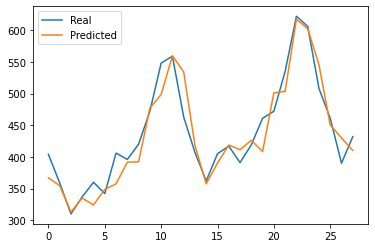


Ensemble Model K best Average series` predicitions:



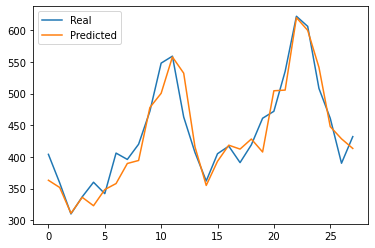


Ensemble Model best Median series` predicitions:



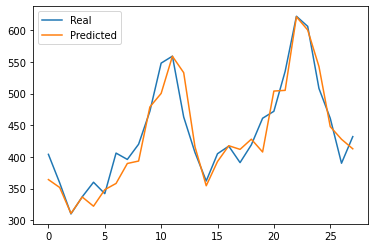


Ensemble Model K best Median series` predicitions:



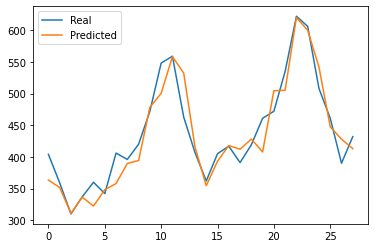






Best Result: Experiment # 25 . Mean Squared Error = 791.160566



In [104]:
pso(120, 100, 3, 0.8, 40, 30)

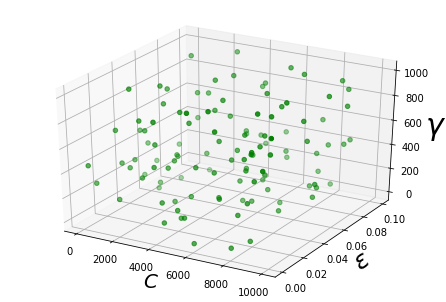






Experiment # 1: done. MSE_g_Best: 792.999772; MSE_AV: 797.190307; MSE_MD: 794.545728; MSE_k_AV: 788.750050; MSE_k_MD: 792.679238


Experiment # 2: done. MSE_g_Best: 793.798451; MSE_AV: 801.094777; MSE_MD: 794.048289; MSE_k_AV: 787.733911; MSE_k_MD: 792.101458


Experiment # 3: done. MSE_g_Best: 793.625767; MSE_AV: 801.807157; MSE_MD: 793.696969; MSE_k_AV: 789.052417; MSE_k_MD: 792.197834


Experiment # 4: done. MSE_g_Best: 794.397108; MSE_AV: 798.846849; MSE_MD: 792.949732; MSE_k_AV: 788.433951; MSE_k_MD: 792.987525


Experiment # 5: done. MSE_g_Best: 793.966207; MSE_AV: 800.569873; MSE_MD: 793.199991; MSE_k_AV: 787.363078; MSE_k_MD: 792.104833


Experiment # 6: done. MSE_g_Best: 685.036787; MSE_AV: 765.757674; MSE_MD: 711.922701; MSE_k_AV: 676.502766; MSE_k_MD: 680.481056


Experiment # 7: done. MSE_g_Best: 793.607344; MSE_AV: 796.858957; MSE_MD: 793.580659; MSE_k_AV: 788.339515; MSE_k_MD: 792.146493


Experiment # 8: done. MSE_g_Best: 793.564817; MSE_AV: 799.706133; MSE_MD: 793.

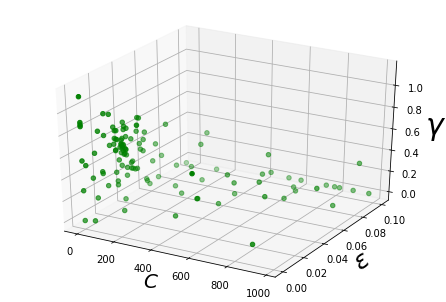






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 685.036787

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 765.757674

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 676.502766

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 711.922701

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 680.481056

Best Configuration Found:

SVR(C=1.0732458469832016, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.03400001082530003, gamma=0.5203444664188379, kernel='rbf',
    max_iter=-1, shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



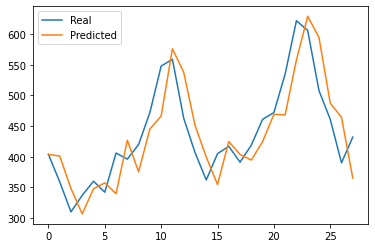


Ensemble Model series` predicitions:



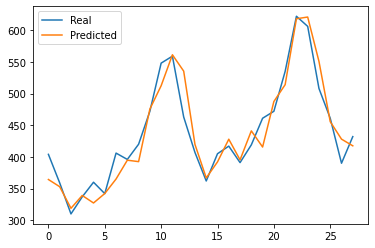


Ensemble Model best Average series` predicitions:



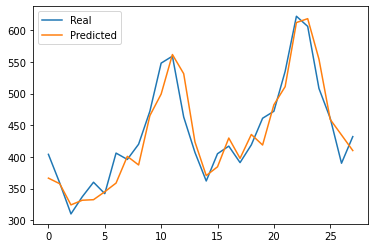


Ensemble Model K best Average series` predicitions:



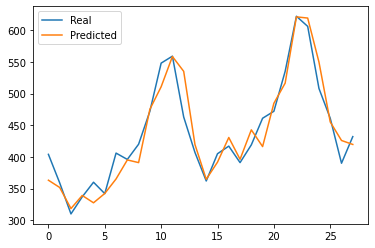


Ensemble Model best Median series` predicitions:



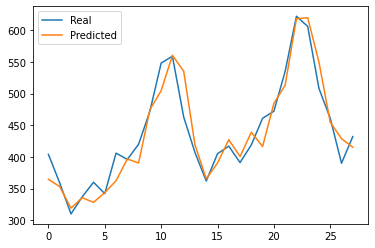


Ensemble Model K best Median series` predicitions:



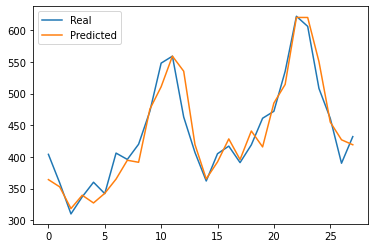






Best Result: Experiment # 6 . Mean Squared Error = 685.036787



In [105]:
pso(120, 100, 3, 0.8, 50, 30)

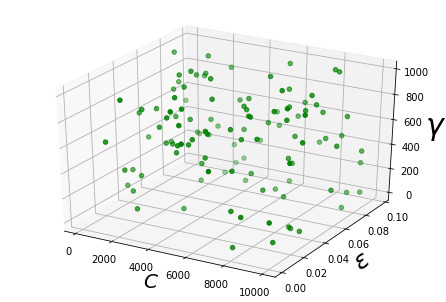






Experiment # 1: done. MSE_g_Best: 875.537895; MSE_AV: 875.004456; MSE_MD: 876.103630; MSE_k_AV: 866.478092; MSE_k_MD: 873.871129


Experiment # 2: done. MSE_g_Best: 794.707167; MSE_AV: 805.583312; MSE_MD: 793.518402; MSE_k_AV: 788.682843; MSE_k_MD: 793.348650


Experiment # 3: done. MSE_g_Best: 792.955925; MSE_AV: 801.423927; MSE_MD: 792.464016; MSE_k_AV: 790.623128; MSE_k_MD: 793.198367


Experiment # 4: done. MSE_g_Best: 793.447948; MSE_AV: 805.485660; MSE_MD: 791.993828; MSE_k_AV: 786.857825; MSE_k_MD: 791.580141


Experiment # 5: done. MSE_g_Best: 794.959789; MSE_AV: 796.195324; MSE_MD: 793.983003; MSE_k_AV: 791.299385; MSE_k_MD: 793.771120


Experiment # 6: done. MSE_g_Best: 795.214908; MSE_AV: 801.710497; MSE_MD: 794.426672; MSE_k_AV: 789.860359; MSE_k_MD: 793.322683


Experiment # 7: done. MSE_g_Best: 793.738508; MSE_AV: 799.695690; MSE_MD: 793.174375; MSE_k_AV: 788.799265; MSE_k_MD: 791.465175


Experiment # 8: done. MSE_g_Best: 792.904245; MSE_AV: 800.524773; MSE_MD: 793.

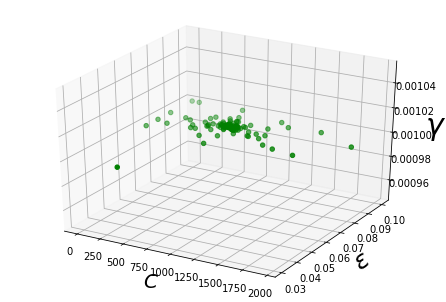






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 791.740142

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 798.527320

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 786.654364

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 790.897193

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 791.121607

Best Configuration Found:

SVR(C=690.4713539211394, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08293337784282052, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



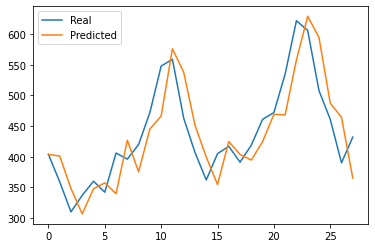


Ensemble Model series` predicitions:



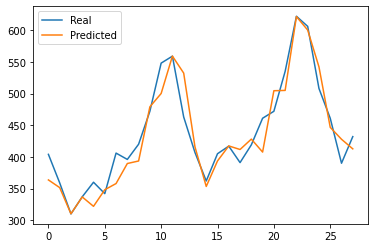


Ensemble Model best Average series` predicitions:



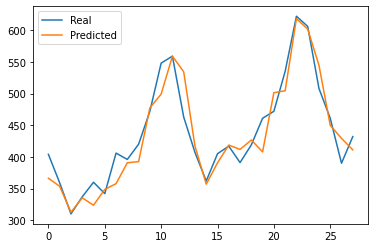


Ensemble Model K best Average series` predicitions:



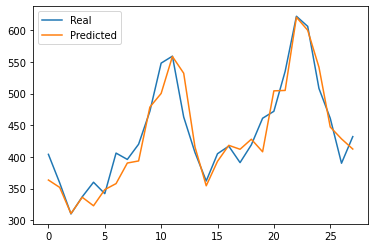


Ensemble Model best Median series` predicitions:



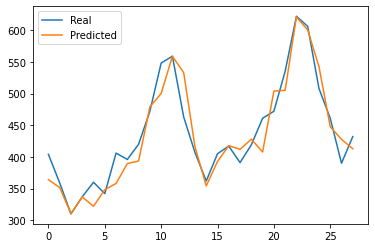


Ensemble Model K best Median series` predicitions:



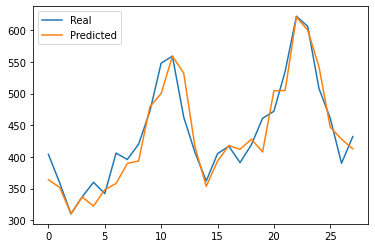






Best Result: Experiment # 17 . Mean Squared Error = 791.740142



In [106]:
pso(120, 100, 3, 0.8, 60, 30)

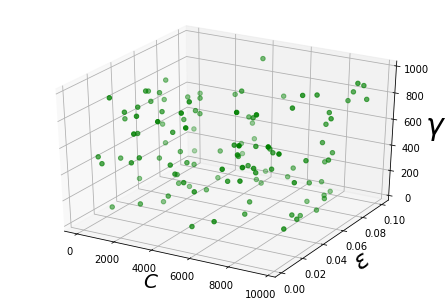






Experiment # 1: done. MSE_g_Best: 793.400982; MSE_AV: 794.060226; MSE_MD: 793.965109; MSE_k_AV: 792.503515; MSE_k_MD: 792.672196


Experiment # 2: done. MSE_g_Best: 792.999579; MSE_AV: 793.690023; MSE_MD: 793.581868; MSE_k_AV: 785.256650; MSE_k_MD: 792.090209


Experiment # 3: done. MSE_g_Best: 794.396255; MSE_AV: 793.981775; MSE_MD: 793.913938; MSE_k_AV: 792.406553; MSE_k_MD: 791.936182


Experiment # 4: done. MSE_g_Best: 793.552062; MSE_AV: 793.886277; MSE_MD: 793.938273; MSE_k_AV: 787.099713; MSE_k_MD: 790.278868


Experiment # 5: done. MSE_g_Best: 792.788731; MSE_AV: 793.837131; MSE_MD: 793.633854; MSE_k_AV: 792.126693; MSE_k_MD: 792.245769


Experiment # 6: done. MSE_g_Best: 793.639751; MSE_AV: 793.796878; MSE_MD: 794.290146; MSE_k_AV: 785.870263; MSE_k_MD: 781.622925


Experiment # 7: done. MSE_g_Best: 793.414416; MSE_AV: 795.526142; MSE_MD: 794.244071; MSE_k_AV: 790.670486; MSE_k_MD: 792.700765


Experiment # 8: done. MSE_g_Best: 779.298179; MSE_AV: 780.306466; MSE_MD: 779.

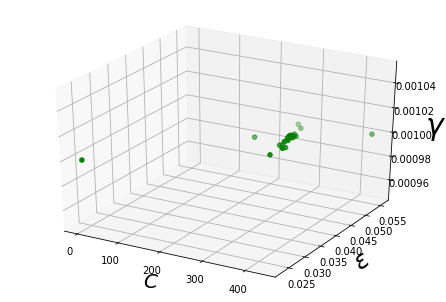






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 779.298179

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 780.306466

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 775.846112

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 779.295093

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 775.755240

Best Configuration Found:

SVR(C=297.8449653978338, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.048327658624201235, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



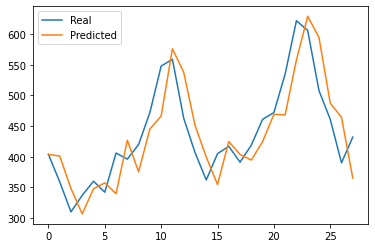


Ensemble Model series` predicitions:



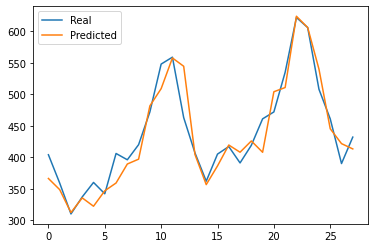


Ensemble Model best Average series` predicitions:



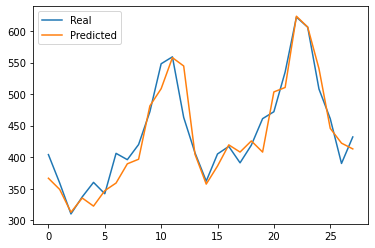


Ensemble Model K best Average series` predicitions:



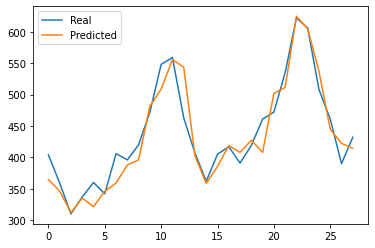


Ensemble Model best Median series` predicitions:



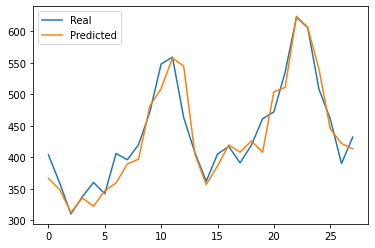


Ensemble Model K best Median series` predicitions:



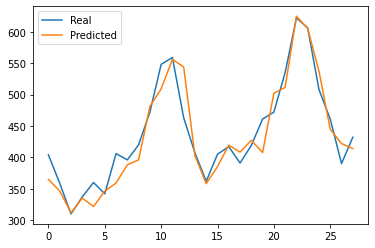






Best Result: Experiment # 8 . Mean Squared Error = 779.298179



In [107]:
pso(120, 100, 3, 0.6, 5, 30)

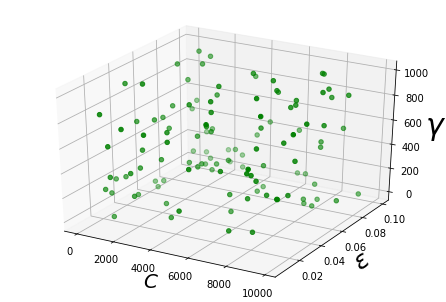






Experiment # 1: done. MSE_g_Best: 794.586942; MSE_AV: 794.872549; MSE_MD: 794.237260; MSE_k_AV: 792.863346; MSE_k_MD: 793.037181


Experiment # 2: done. MSE_g_Best: 793.552588; MSE_AV: 793.143572; MSE_MD: 794.124567; MSE_k_AV: 789.375861; MSE_k_MD: 792.347022


Experiment # 3: done. MSE_g_Best: 794.136430; MSE_AV: 794.238225; MSE_MD: 794.148951; MSE_k_AV: 792.688705; MSE_k_MD: 792.624216


Experiment # 4: done. MSE_g_Best: 793.626671; MSE_AV: 794.238903; MSE_MD: 794.228118; MSE_k_AV: 792.962799; MSE_k_MD: 793.014383


Experiment # 5: done. MSE_g_Best: 793.227732; MSE_AV: 794.365411; MSE_MD: 794.295887; MSE_k_AV: 792.515018; MSE_k_MD: 792.923202


Experiment # 6: done. MSE_g_Best: 793.090171; MSE_AV: 794.385088; MSE_MD: 793.625445; MSE_k_AV: 773.747136; MSE_k_MD: 780.070863


Experiment # 7: done. MSE_g_Best: 792.804499; MSE_AV: 793.800236; MSE_MD: 793.909819; MSE_k_AV: 789.358752; MSE_k_MD: 792.113718


Experiment # 8: done. MSE_g_Best: 793.555301; MSE_AV: 794.173879; MSE_MD: 794.

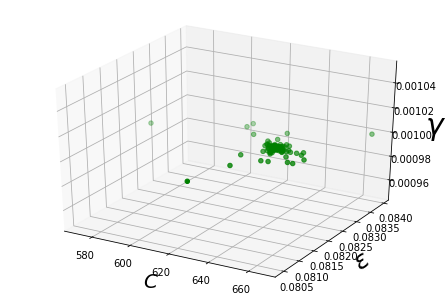






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 792.349048

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 794.277506

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 792.776518

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 794.144499

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 792.524093

Best Configuration Found:

SVR(C=637.7924612613311, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08254801098755718, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



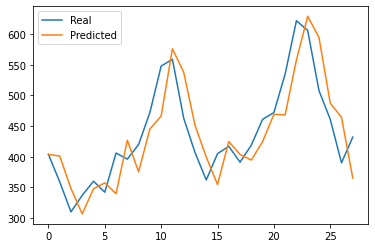


Ensemble Model series` predicitions:



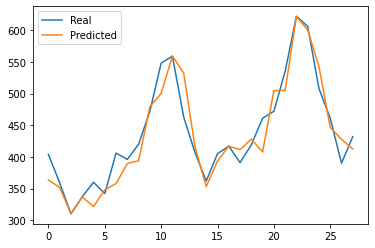


Ensemble Model best Average series` predicitions:



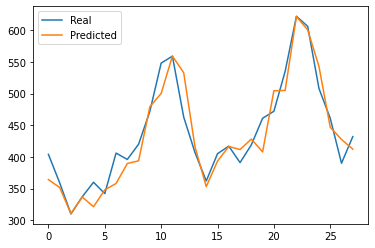


Ensemble Model K best Average series` predicitions:



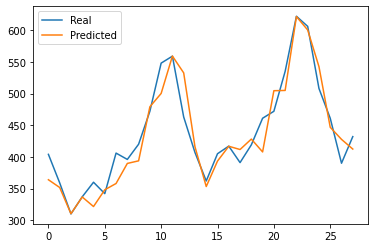


Ensemble Model best Median series` predicitions:



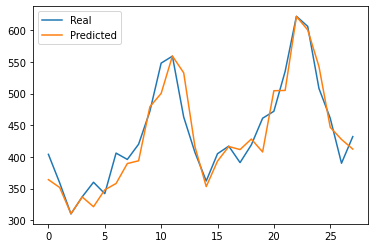


Ensemble Model K best Median series` predicitions:



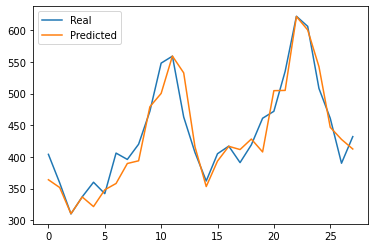






Best Result: Experiment # 10 . Mean Squared Error = 792.349048



In [108]:
pso(120, 100, 3, 0.6, 10, 30)

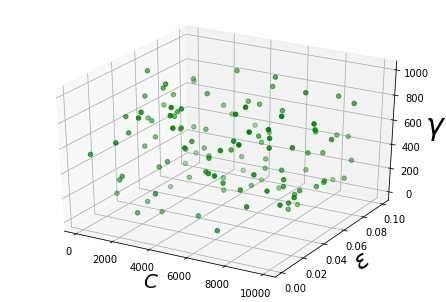






Experiment # 1: done. MSE_g_Best: 792.770010; MSE_AV: 794.000429; MSE_MD: 794.072192; MSE_k_AV: 792.388640; MSE_k_MD: 793.530043


Experiment # 2: done. MSE_g_Best: 794.735176; MSE_AV: 794.441322; MSE_MD: 794.297975; MSE_k_AV: 793.372172; MSE_k_MD: 793.430276


Experiment # 3: done. MSE_g_Best: 793.583224; MSE_AV: 793.956718; MSE_MD: 794.103469; MSE_k_AV: 792.409056; MSE_k_MD: 793.445441


Experiment # 4: done. MSE_g_Best: 793.819792; MSE_AV: 795.733807; MSE_MD: 794.404844; MSE_k_AV: 793.216322; MSE_k_MD: 793.403097


Experiment # 5: done. MSE_g_Best: 793.582118; MSE_AV: 794.231333; MSE_MD: 794.384208; MSE_k_AV: 792.229036; MSE_k_MD: 793.499736


Experiment # 6: done. MSE_g_Best: 792.776813; MSE_AV: 793.752141; MSE_MD: 793.697144; MSE_k_AV: 791.765580; MSE_k_MD: 792.916482


Experiment # 7: done. MSE_g_Best: 792.632296; MSE_AV: 793.528821; MSE_MD: 793.623775; MSE_k_AV: 792.051852; MSE_k_MD: 792.512969


Experiment # 8: done. MSE_g_Best: 793.209264; MSE_AV: 794.027003; MSE_MD: 794.

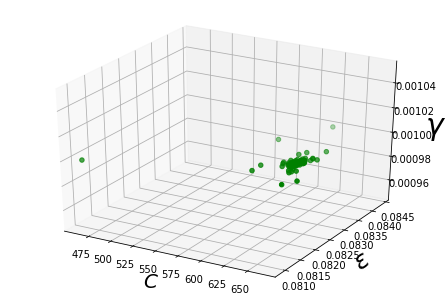






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 792.462956

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 793.807659

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 792.653638

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 793.731870

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 792.579531

Best Configuration Found:

SVR(C=641.9249180684458, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08256035292089738, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



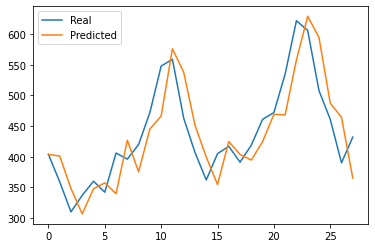


Ensemble Model series` predicitions:



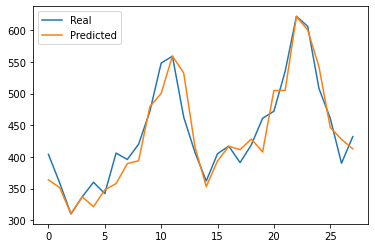


Ensemble Model best Average series` predicitions:



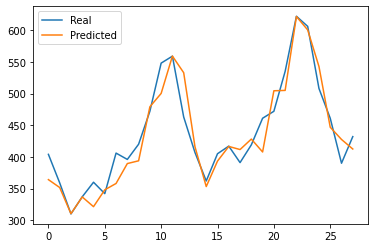


Ensemble Model K best Average series` predicitions:



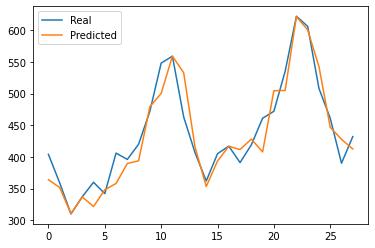


Ensemble Model best Median series` predicitions:



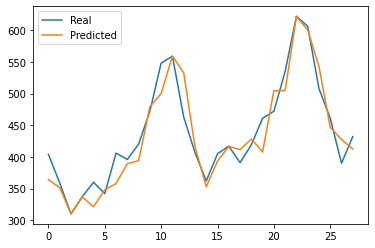


Ensemble Model K best Median series` predicitions:



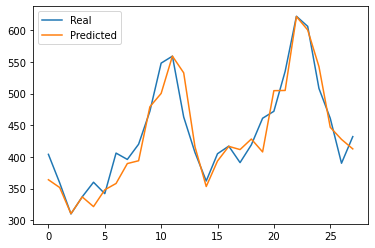






Best Result: Experiment # 24 . Mean Squared Error = 792.462956



In [109]:
pso(120, 100, 3, 0.6, 20, 30)

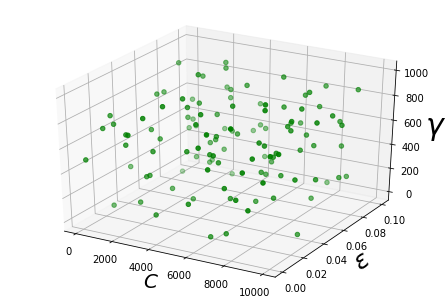






Experiment # 1: done. MSE_g_Best: 794.058387; MSE_AV: 793.786281; MSE_MD: 793.794494; MSE_k_AV: 792.801474; MSE_k_MD: 793.097155


Experiment # 2: done. MSE_g_Best: 792.678423; MSE_AV: 793.798806; MSE_MD: 793.912929; MSE_k_AV: 792.530930; MSE_k_MD: 792.908640


Experiment # 3: done. MSE_g_Best: 793.553291; MSE_AV: 794.346083; MSE_MD: 794.207107; MSE_k_AV: 793.637214; MSE_k_MD: 793.474365


Experiment # 4: done. MSE_g_Best: 828.817130; MSE_AV: 829.799381; MSE_MD: 830.672207; MSE_k_AV: 828.486050; MSE_k_MD: 828.300630


Experiment # 5: done. MSE_g_Best: 793.790857; MSE_AV: 794.269309; MSE_MD: 794.205501; MSE_k_AV: 793.174153; MSE_k_MD: 793.598133


Experiment # 6: done. MSE_g_Best: 793.278117; MSE_AV: 793.889417; MSE_MD: 793.761484; MSE_k_AV: 792.713161; MSE_k_MD: 792.831605


Experiment # 7: done. MSE_g_Best: 793.646100; MSE_AV: 794.398092; MSE_MD: 794.061241; MSE_k_AV: 792.176190; MSE_k_MD: 792.973121


Experiment # 8: done. MSE_g_Best: 793.736778; MSE_AV: 794.117688; MSE_MD: 794.

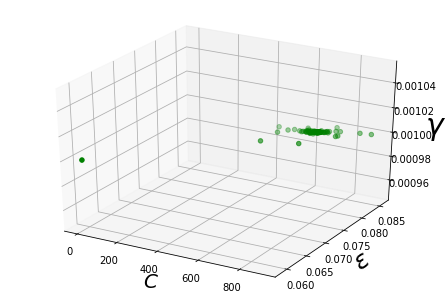






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 791.227995

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 792.987211

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 788.069847

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 792.348393

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 789.457269

Best Configuration Found:

SVR(C=691.950424065053, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08298141847615911, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



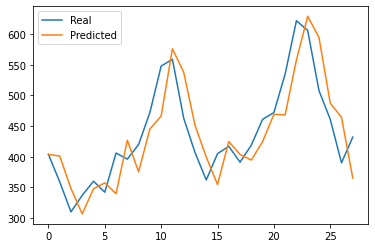


Ensemble Model series` predicitions:



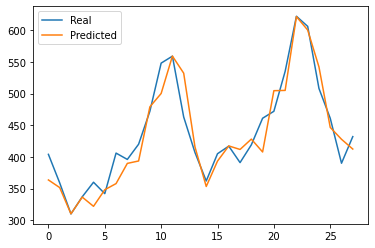


Ensemble Model best Average series` predicitions:



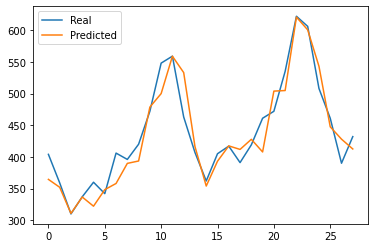


Ensemble Model K best Average series` predicitions:



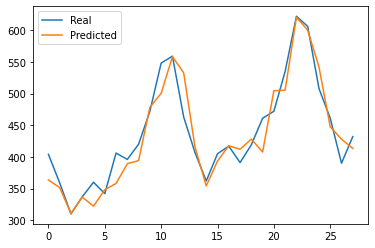


Ensemble Model best Median series` predicitions:



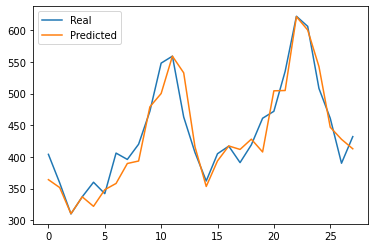


Ensemble Model K best Median series` predicitions:



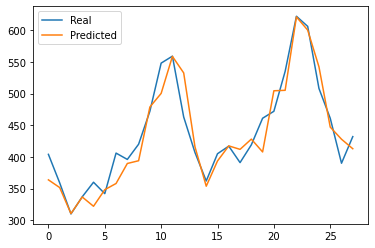






Best Result: Experiment # 30 . Mean Squared Error = 791.227995



In [110]:
pso(120, 100, 3, 0.6, 30, 30)

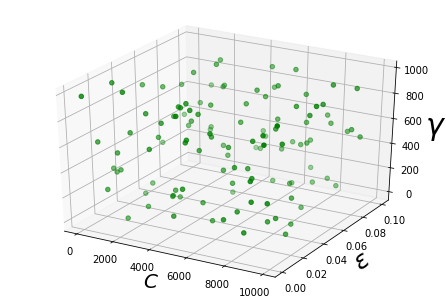






Experiment # 1: done. MSE_g_Best: 794.694728; MSE_AV: 794.348994; MSE_MD: 794.286155; MSE_k_AV: 793.670768; MSE_k_MD: 793.827443


Experiment # 2: done. MSE_g_Best: 793.558109; MSE_AV: 793.248603; MSE_MD: 794.041863; MSE_k_AV: 790.623127; MSE_k_MD: 793.336702


Experiment # 3: done. MSE_g_Best: 793.624760; MSE_AV: 794.112744; MSE_MD: 794.040168; MSE_k_AV: 793.296820; MSE_k_MD: 793.671305


Experiment # 4: done. MSE_g_Best: 792.509067; MSE_AV: 793.844890; MSE_MD: 793.684529; MSE_k_AV: 792.924421; MSE_k_MD: 793.050889


Experiment # 5: done. MSE_g_Best: 681.040219; MSE_AV: 722.769862; MSE_MD: 682.689583; MSE_k_AV: 680.587919; MSE_k_MD: 681.381768


Experiment # 6: done. MSE_g_Best: 793.511004; MSE_AV: 794.105917; MSE_MD: 793.842705; MSE_k_AV: 792.903726; MSE_k_MD: 793.203857


Experiment # 7: done. MSE_g_Best: 792.810706; MSE_AV: 794.053325; MSE_MD: 793.942186; MSE_k_AV: 793.246756; MSE_k_MD: 793.363286


Experiment # 8: done. MSE_g_Best: 793.565420; MSE_AV: 793.969562; MSE_MD: 794.

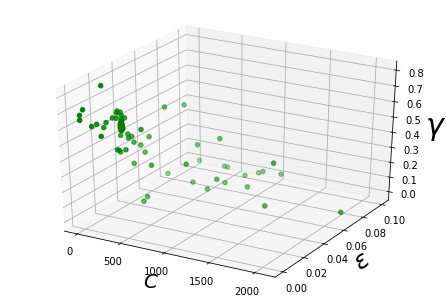






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 681.040219

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 722.769862

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 680.587919

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 682.689583

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 681.381768

Best Configuration Found:

SVR(C=1.1714078566933144, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.03456060399868599, gamma=0.48496999182285944, kernel='rbf',
    max_iter=-1, shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



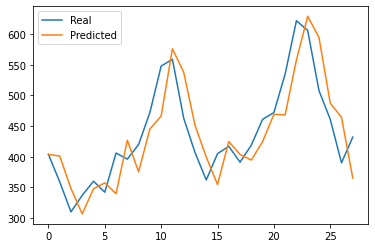


Ensemble Model series` predicitions:



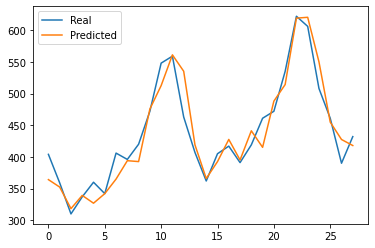


Ensemble Model best Average series` predicitions:



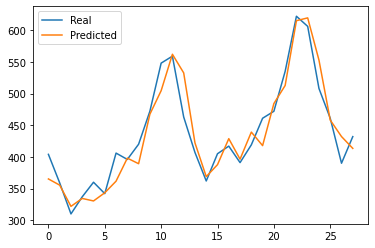


Ensemble Model K best Average series` predicitions:



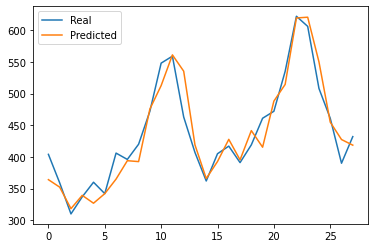


Ensemble Model best Median series` predicitions:



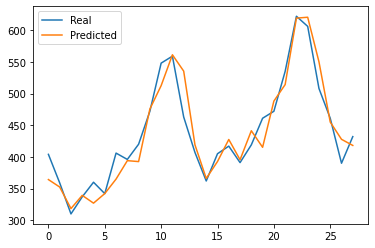


Ensemble Model K best Median series` predicitions:



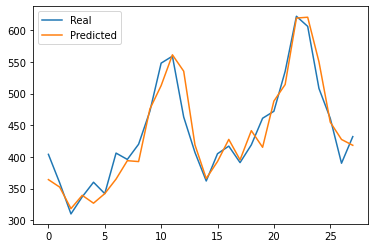






Best Result: Experiment # 5 . Mean Squared Error = 681.040219



In [111]:
pso(120, 100, 3, 0.6, 40, 30)

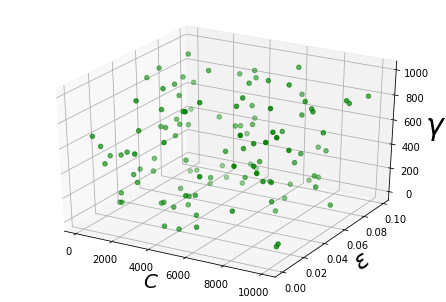






Experiment # 1: done. MSE_g_Best: 794.246585; MSE_AV: 792.945638; MSE_MD: 794.083264; MSE_k_AV: 790.441744; MSE_k_MD: 792.876884


Experiment # 2: done. MSE_g_Best: 792.811055; MSE_AV: 794.189908; MSE_MD: 794.094376; MSE_k_AV: 793.388487; MSE_k_MD: 793.483482


Experiment # 3: done. MSE_g_Best: 827.847145; MSE_AV: 827.623621; MSE_MD: 827.795452; MSE_k_AV: 827.472018; MSE_k_MD: 827.607628


Experiment # 4: done. MSE_g_Best: 793.627178; MSE_AV: 793.986055; MSE_MD: 794.125765; MSE_k_AV: 793.331564; MSE_k_MD: 793.695208


Experiment # 5: done. MSE_g_Best: 793.566312; MSE_AV: 794.067379; MSE_MD: 794.058120; MSE_k_AV: 793.173217; MSE_k_MD: 793.525216


Experiment # 6: done. MSE_g_Best: 792.619760; MSE_AV: 794.062097; MSE_MD: 794.017840; MSE_k_AV: 792.844441; MSE_k_MD: 793.193160


Experiment # 7: done. MSE_g_Best: 793.582072; MSE_AV: 794.206756; MSE_MD: 794.159717; MSE_k_AV: 793.583183; MSE_k_MD: 793.705647


Experiment # 8: done. MSE_g_Best: 794.016250; MSE_AV: 794.102268; MSE_MD: 794.

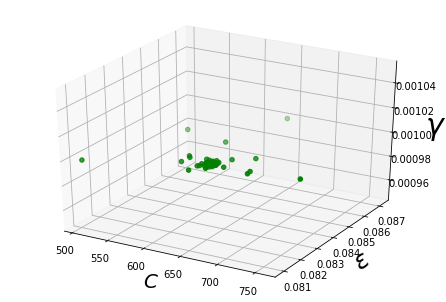






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 792.579841

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 793.466841

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 792.532435

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 793.586155

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 793.059257

Best Configuration Found:

SVR(C=643.4977055738625, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08253331826896564, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



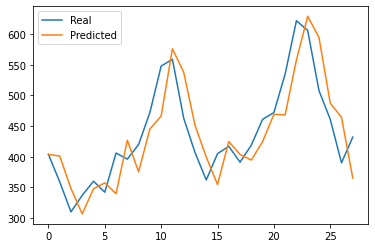


Ensemble Model series` predicitions:



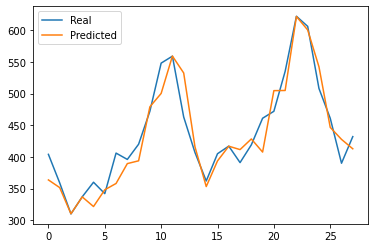


Ensemble Model best Average series` predicitions:



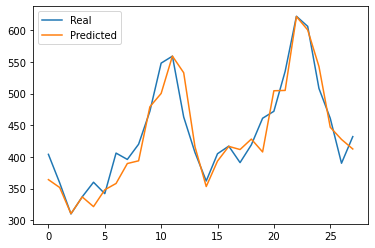


Ensemble Model K best Average series` predicitions:



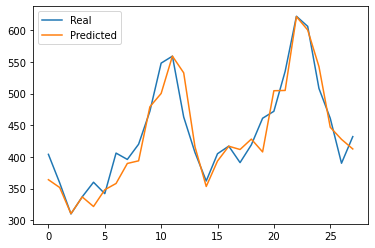


Ensemble Model best Median series` predicitions:



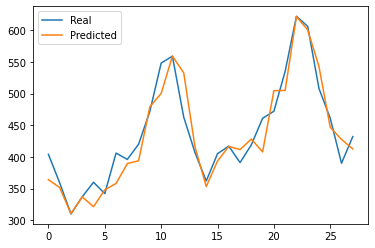


Ensemble Model K best Median series` predicitions:



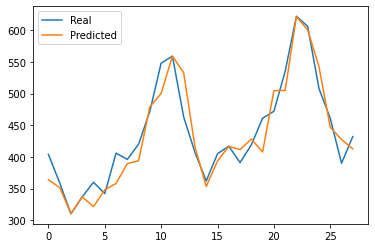






Best Result: Experiment # 11 . Mean Squared Error = 792.579841



In [112]:
pso(120, 100, 3, 0.6, 50, 30)

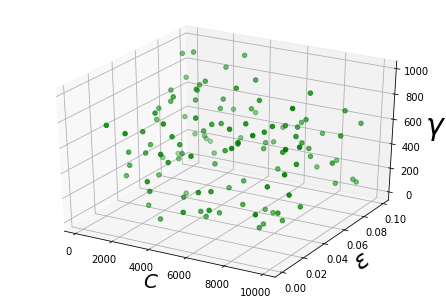






Experiment # 1: done. MSE_g_Best: 794.894016; MSE_AV: 794.674406; MSE_MD: 794.523738; MSE_k_AV: 794.000220; MSE_k_MD: 794.220766


Experiment # 2: done. MSE_g_Best: 792.957652; MSE_AV: 794.047874; MSE_MD: 793.992166; MSE_k_AV: 793.438720; MSE_k_MD: 793.513059


Experiment # 3: done. MSE_g_Best: 793.572075; MSE_AV: 793.948864; MSE_MD: 794.070933; MSE_k_AV: 793.364372; MSE_k_MD: 793.630752


Experiment # 4: done. MSE_g_Best: 793.788116; MSE_AV: 793.910598; MSE_MD: 793.896430; MSE_k_AV: 793.286228; MSE_k_MD: 793.813951


Experiment # 5: done. MSE_g_Best: 792.693020; MSE_AV: 792.600710; MSE_MD: 792.598542; MSE_k_AV: 791.811931; MSE_k_MD: 792.371617


Experiment # 6: done. MSE_g_Best: 793.241234; MSE_AV: 793.803867; MSE_MD: 793.861585; MSE_k_AV: 793.188690; MSE_k_MD: 793.494306


Experiment # 7: done. MSE_g_Best: 875.367032; MSE_AV: 875.754141; MSE_MD: 875.795684; MSE_k_AV: 874.818148; MSE_k_MD: 875.135029


Experiment # 8: done. MSE_g_Best: 875.713331; MSE_AV: 875.927921; MSE_MD: 875.

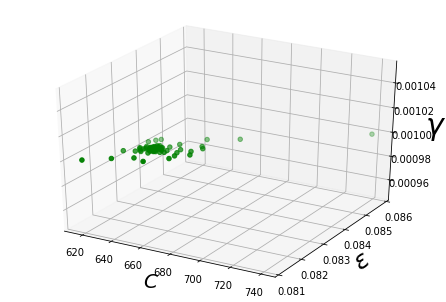






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 792.222655

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 793.458218

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 792.638838

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 793.570106

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 792.993189

Best Configuration Found:

SVR(C=642.7266147754275, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08259808561446212, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



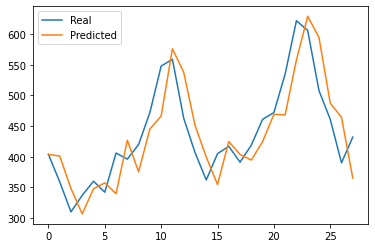


Ensemble Model series` predicitions:



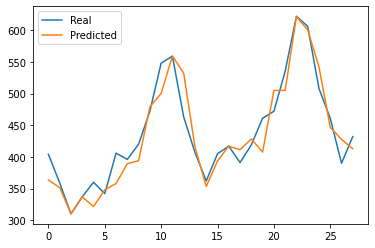


Ensemble Model best Average series` predicitions:



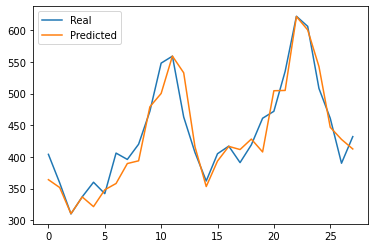


Ensemble Model K best Average series` predicitions:



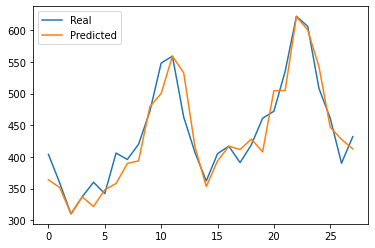


Ensemble Model best Median series` predicitions:



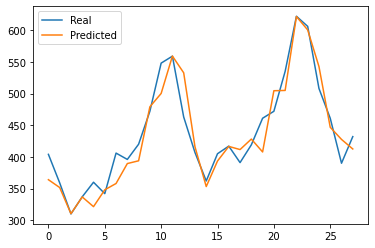


Ensemble Model K best Median series` predicitions:



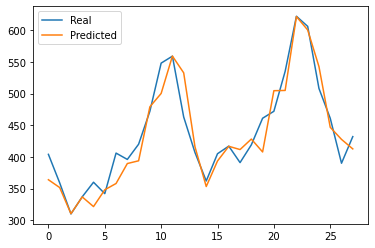






Best Result: Experiment # 24 . Mean Squared Error = 792.222655



In [113]:
pso(120, 100, 3, 0.6, 60, 30)

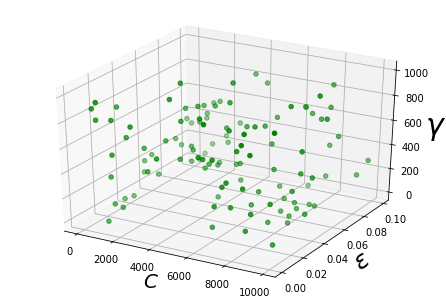






Experiment # 1: done. MSE_g_Best: 795.595618; MSE_AV: 796.475266; MSE_MD: 794.050339; MSE_k_AV: 784.775516; MSE_k_MD: 784.173328


Experiment # 2: done. MSE_g_Best: 793.550491; MSE_AV: 794.031132; MSE_MD: 793.890724; MSE_k_AV: 792.862064; MSE_k_MD: 793.182703


Experiment # 3: done. MSE_g_Best: 793.409514; MSE_AV: 793.936377; MSE_MD: 793.795055; MSE_k_AV: 792.836067; MSE_k_MD: 792.743048


Experiment # 4: done. MSE_g_Best: 776.374277; MSE_AV: 776.981647; MSE_MD: 776.674361; MSE_k_AV: 776.192194; MSE_k_MD: 776.100950


Experiment # 5: done. MSE_g_Best: 793.570115; MSE_AV: 794.152210; MSE_MD: 793.965620; MSE_k_AV: 792.372784; MSE_k_MD: 792.390565


Experiment # 6: done. MSE_g_Best: 792.938394; MSE_AV: 793.074907; MSE_MD: 793.358541; MSE_k_AV: 783.705320; MSE_k_MD: 790.570907


Experiment # 7: done. MSE_g_Best: 793.546044; MSE_AV: 793.291243; MSE_MD: 793.876715; MSE_k_AV: 787.533428; MSE_k_MD: 790.416859


Experiment # 8: done. MSE_g_Best: 793.264695; MSE_AV: 794.549925; MSE_MD: 793.

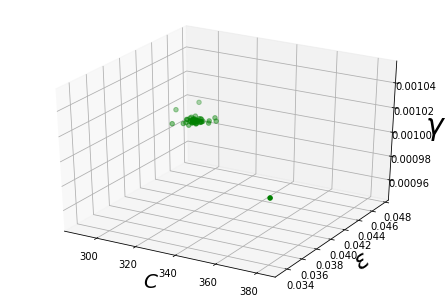






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 776.145538

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 776.328050

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 772.286562

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 776.445140

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 774.782617

Best Configuration Found:

SVR(C=305.419600643705, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.04386788061448064, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



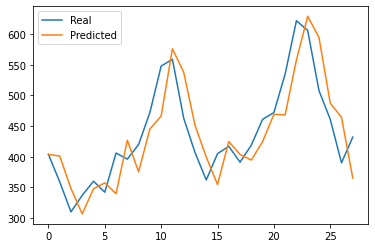


Ensemble Model series` predicitions:



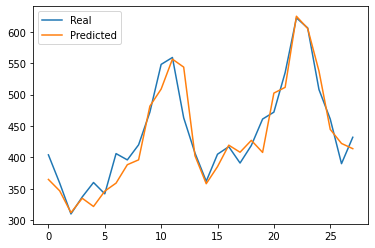


Ensemble Model best Average series` predicitions:



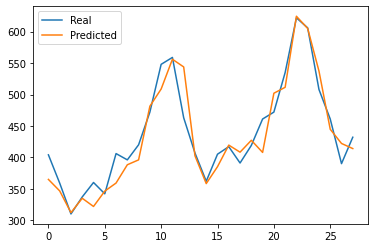


Ensemble Model K best Average series` predicitions:



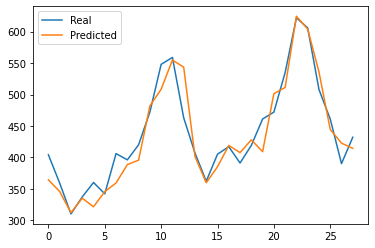


Ensemble Model best Median series` predicitions:



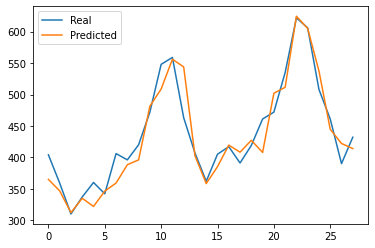


Ensemble Model K best Median series` predicitions:



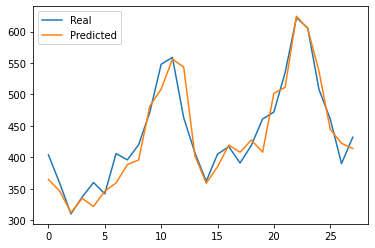






Best Result: Experiment # 25 . Mean Squared Error = 776.145538



In [27]:
pso(120, 100, 3, 0.2, 5, 30)

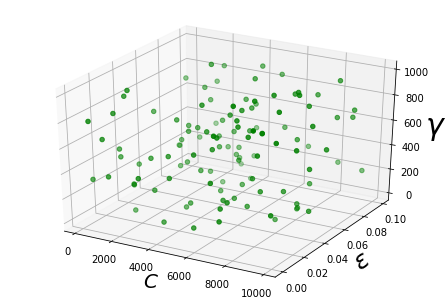






Experiment # 1: done. MSE_g_Best: 794.490384; MSE_AV: 793.797802; MSE_MD: 794.424817; MSE_k_AV: 783.933614; MSE_k_MD: 792.012182


Experiment # 2: done. MSE_g_Best: 875.690150; MSE_AV: 875.670049; MSE_MD: 875.745792; MSE_k_AV: 873.884565; MSE_k_MD: 873.639933


Experiment # 3: done. MSE_g_Best: 793.693946; MSE_AV: 794.613208; MSE_MD: 794.506659; MSE_k_AV: 793.481282; MSE_k_MD: 794.039014


Experiment # 4: done. MSE_g_Best: 792.586215; MSE_AV: 793.487946; MSE_MD: 793.323698; MSE_k_AV: 792.339960; MSE_k_MD: 792.064915


Experiment # 5: done. MSE_g_Best: 775.600749; MSE_AV: 776.797354; MSE_MD: 776.108706; MSE_k_AV: 775.086923; MSE_k_MD: 774.926330


Experiment # 6: done. MSE_g_Best: 779.519799; MSE_AV: 778.764802; MSE_MD: 779.441885; MSE_k_AV: 774.997289; MSE_k_MD: 774.799419


Experiment # 7: done. MSE_g_Best: 794.482253; MSE_AV: 794.393755; MSE_MD: 794.352317; MSE_k_AV: 793.027032; MSE_k_MD: 793.396198


Experiment # 8: done. MSE_g_Best: 793.549103; MSE_AV: 794.117988; MSE_MD: 794.

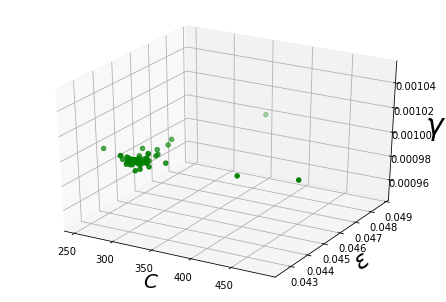






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 775.600749

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 776.797354

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 775.086923

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 776.108706

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 774.926330

Best Configuration Found:

SVR(C=303.9580833865796, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.04326439804104479, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



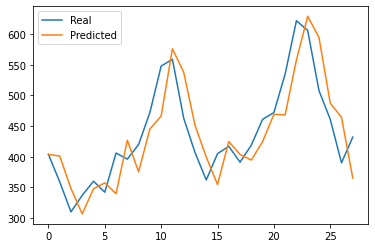


Ensemble Model series` predicitions:



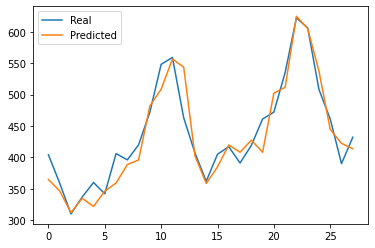


Ensemble Model best Average series` predicitions:



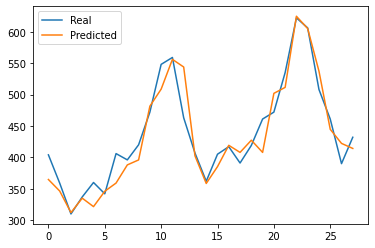


Ensemble Model K best Average series` predicitions:



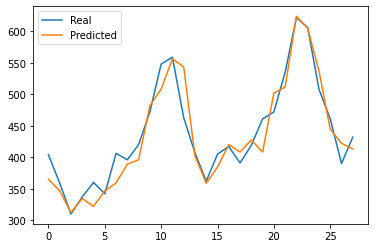


Ensemble Model best Median series` predicitions:



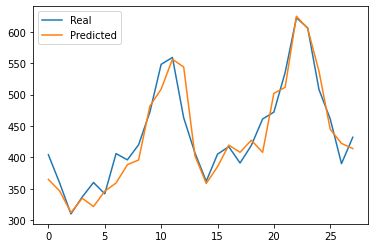


Ensemble Model K best Median series` predicitions:



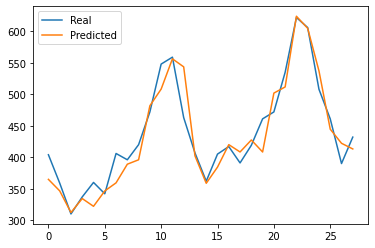






Best Result: Experiment # 5 . Mean Squared Error = 775.600749



In [28]:
pso(120, 100, 3, 0.2, 10, 30)

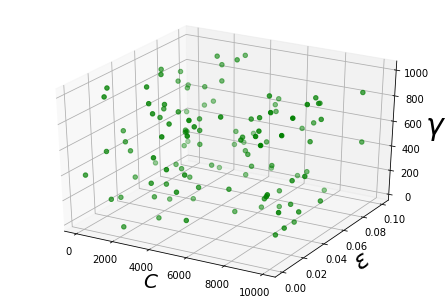






Experiment # 1: done. MSE_g_Best: 792.097586; MSE_AV: 793.386289; MSE_MD: 793.259816; MSE_k_AV: 792.254950; MSE_k_MD: 792.533870


Experiment # 2: done. MSE_g_Best: 793.566941; MSE_AV: 794.205285; MSE_MD: 794.042205; MSE_k_AV: 793.202251; MSE_k_MD: 793.443692


Experiment # 3: done. MSE_g_Best: 875.550255; MSE_AV: 875.795734; MSE_MD: 875.809991; MSE_k_AV: 874.660706; MSE_k_MD: 874.763411


Experiment # 4: done. MSE_g_Best: 875.734883; MSE_AV: 875.698355; MSE_MD: 875.918966; MSE_k_AV: 874.478381; MSE_k_MD: 874.754609


Experiment # 5: done. MSE_g_Best: 794.629915; MSE_AV: 793.976795; MSE_MD: 793.949153; MSE_k_AV: 792.978356; MSE_k_MD: 793.090268


Experiment # 6: done. MSE_g_Best: 776.668327; MSE_AV: 777.375642; MSE_MD: 777.313123; MSE_k_AV: 775.791248; MSE_k_MD: 776.644081


Experiment # 7: done. MSE_g_Best: 792.842586; MSE_AV: 793.624161; MSE_MD: 793.573556; MSE_k_AV: 792.831762; MSE_k_MD: 793.046782


Experiment # 8: done. MSE_g_Best: 792.810186; MSE_AV: 794.058693; MSE_MD: 793.

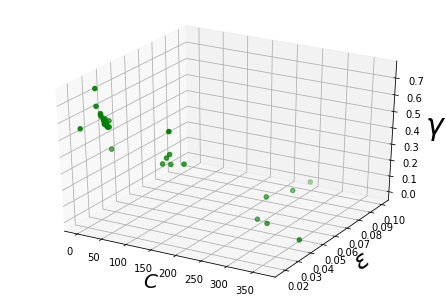






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 686.537465

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 680.293281

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 672.907869

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 687.437615

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 683.500428

Best Configuration Found:

SVR(C=1.041202328380582, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.035210790591732155, gamma=0.5172852677270732, kernel='rbf',
    max_iter=-1, shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



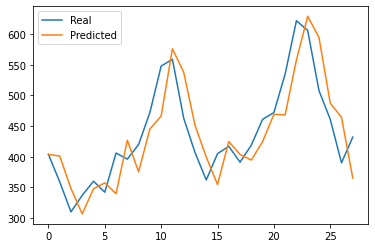


Ensemble Model series` predicitions:



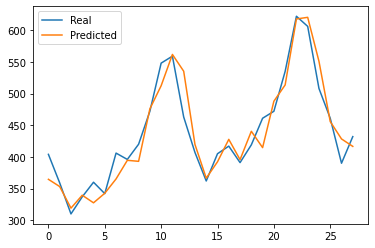


Ensemble Model best Average series` predicitions:



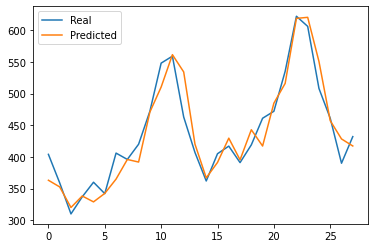


Ensemble Model K best Average series` predicitions:



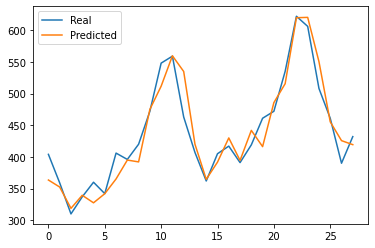


Ensemble Model best Median series` predicitions:



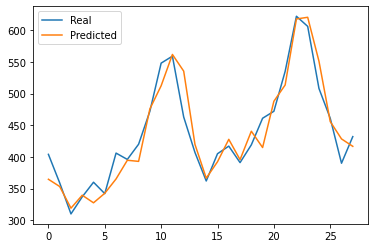


Ensemble Model K best Median series` predicitions:



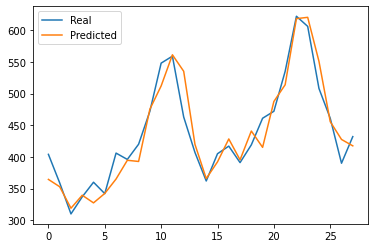






Best Result: Experiment # 30 . Mean Squared Error = 686.537465



In [29]:
pso(120, 100, 3, 0.2, 20, 30)

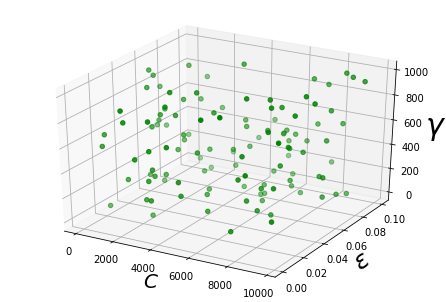






Experiment # 1: done. MSE_g_Best: 793.546379; MSE_AV: 794.044469; MSE_MD: 793.980757; MSE_k_AV: 793.417711; MSE_k_MD: 793.482990


Experiment # 2: done. MSE_g_Best: 876.678261; MSE_AV: 876.357913; MSE_MD: 876.431423; MSE_k_AV: 875.434195; MSE_k_MD: 875.464610


Experiment # 3: done. MSE_g_Best: 793.252144; MSE_AV: 792.969053; MSE_MD: 793.175431; MSE_k_AV: 791.603810; MSE_k_MD: 792.673513


Experiment # 4: done. MSE_g_Best: 793.368715; MSE_AV: 793.986639; MSE_MD: 794.038571; MSE_k_AV: 792.711656; MSE_k_MD: 793.279721


Experiment # 5: done. MSE_g_Best: 792.804597; MSE_AV: 794.075478; MSE_MD: 793.979446; MSE_k_AV: 793.314295; MSE_k_MD: 793.244883


Experiment # 6: done. MSE_g_Best: 792.981106; MSE_AV: 793.450532; MSE_MD: 793.456477; MSE_k_AV: 792.753670; MSE_k_MD: 792.875891


Experiment # 7: done. MSE_g_Best: 793.455333; MSE_AV: 794.038894; MSE_MD: 793.988390; MSE_k_AV: 793.096448; MSE_k_MD: 793.429696


Experiment # 8: done. MSE_g_Best: 794.295481; MSE_AV: 794.526399; MSE_MD: 794.

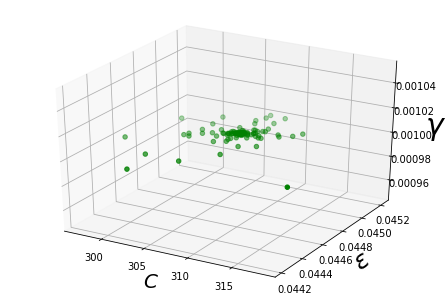






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 776.483921

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 776.923888

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 776.550004

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 776.942036

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 776.356819

Best Configuration Found:

SVR(C=306.7576031296019, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.04490976666647104, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



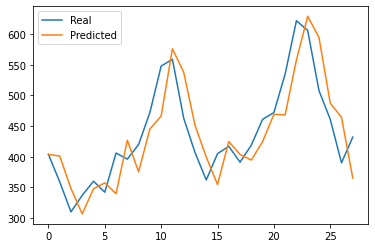


Ensemble Model series` predicitions:



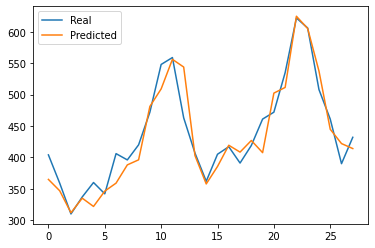


Ensemble Model best Average series` predicitions:



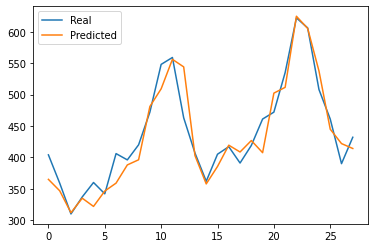


Ensemble Model K best Average series` predicitions:



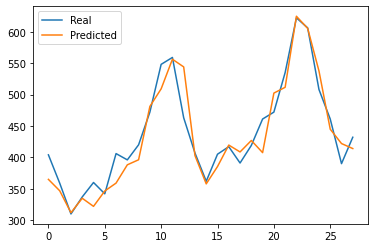


Ensemble Model best Median series` predicitions:



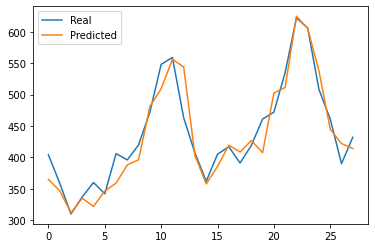


Ensemble Model K best Median series` predicitions:



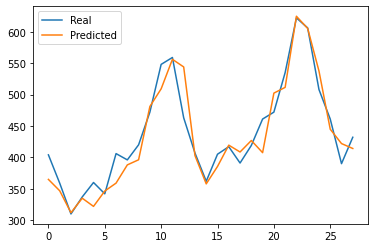






Best Result: Experiment # 15 . Mean Squared Error = 776.483921



In [30]:
pso(120, 100, 3, 0.2, 30, 30)

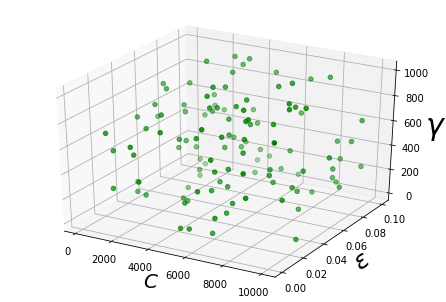






Experiment # 1: done. MSE_g_Best: 794.743307; MSE_AV: 794.321163; MSE_MD: 794.187877; MSE_k_AV: 793.617212; MSE_k_MD: 793.734359


Experiment # 2: done. MSE_g_Best: 794.484695; MSE_AV: 794.471315; MSE_MD: 794.444639; MSE_k_AV: 793.861227; MSE_k_MD: 793.889541


Experiment # 3: done. MSE_g_Best: 827.932670; MSE_AV: 827.613355; MSE_MD: 827.835829; MSE_k_AV: 827.446861; MSE_k_MD: 827.714666


Experiment # 4: done. MSE_g_Best: 791.945250; MSE_AV: 792.367918; MSE_MD: 792.603163; MSE_k_AV: 791.668589; MSE_k_MD: 791.832312


Experiment # 5: done. MSE_g_Best: 679.443034; MSE_AV: 678.155769; MSE_MD: 680.034455; MSE_k_AV: 678.771109; MSE_k_MD: 679.196433


Experiment # 6: done. MSE_g_Best: 794.251188; MSE_AV: 793.939382; MSE_MD: 794.016358; MSE_k_AV: 793.104520; MSE_k_MD: 793.541846


Experiment # 7: done. MSE_g_Best: 794.416553; MSE_AV: 794.570288; MSE_MD: 794.589301; MSE_k_AV: 794.069814; MSE_k_MD: 794.156359


Experiment # 8: done. MSE_g_Best: 794.484319; MSE_AV: 794.285894; MSE_MD: 794.

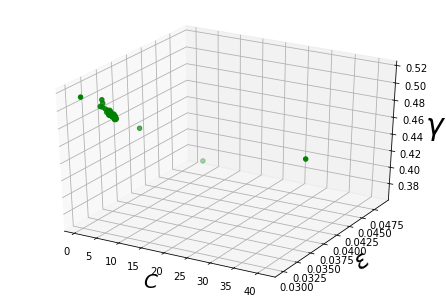






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 679.443034

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 678.155769

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 678.771109

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 680.034455

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 679.196433

Best Configuration Found:

SVR(C=1.2399579702854018, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.034692837755257826, gamma=0.47661276909013833, kernel='rbf',
    max_iter=-1, shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



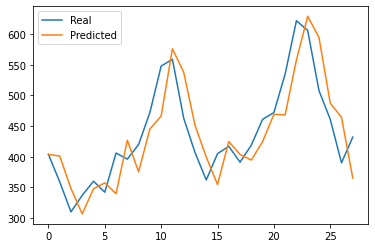


Ensemble Model series` predicitions:



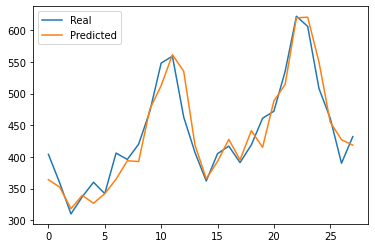


Ensemble Model best Average series` predicitions:



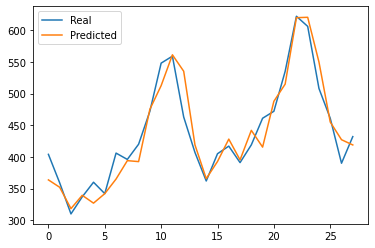


Ensemble Model K best Average series` predicitions:



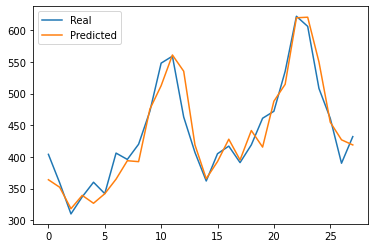


Ensemble Model best Median series` predicitions:



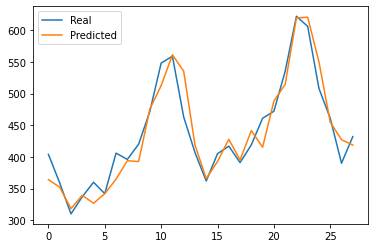


Ensemble Model K best Median series` predicitions:



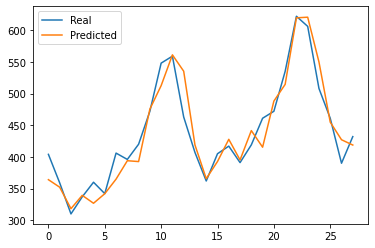






Best Result: Experiment # 5 . Mean Squared Error = 679.443034



In [31]:
pso(120, 100, 3, 0.2, 40, 30)

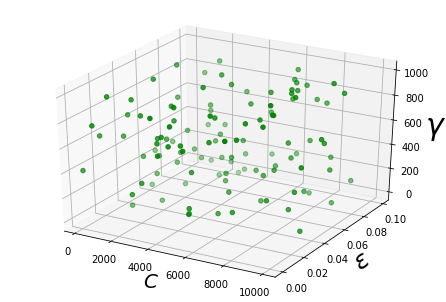






Experiment # 1: done. MSE_g_Best: 776.353467; MSE_AV: 777.069224; MSE_MD: 776.810498; MSE_k_AV: 776.588895; MSE_k_MD: 776.582440


Experiment # 2: done. MSE_g_Best: 792.218016; MSE_AV: 805.391038; MSE_MD: 786.488918; MSE_k_AV: 783.812735; MSE_k_MD: 792.012070


Experiment # 3: done. MSE_g_Best: 793.379027; MSE_AV: 793.865932; MSE_MD: 793.802765; MSE_k_AV: 793.382244; MSE_k_MD: 793.369190


Experiment # 4: done. MSE_g_Best: 793.497622; MSE_AV: 794.256805; MSE_MD: 794.156341; MSE_k_AV: 793.651320; MSE_k_MD: 793.806538


Experiment # 5: done. MSE_g_Best: 876.040893; MSE_AV: 876.532140; MSE_MD: 876.490935; MSE_k_AV: 875.676437; MSE_k_MD: 875.956893


Experiment # 6: done. MSE_g_Best: 794.479370; MSE_AV: 794.495319; MSE_MD: 794.462961; MSE_k_AV: 794.038020; MSE_k_MD: 794.136979


Experiment # 7: done. MSE_g_Best: 793.892966; MSE_AV: 793.953567; MSE_MD: 793.742049; MSE_k_AV: 793.162473; MSE_k_MD: 793.276166


Experiment # 8: done. MSE_g_Best: 875.292164; MSE_AV: 875.763916; MSE_MD: 875.

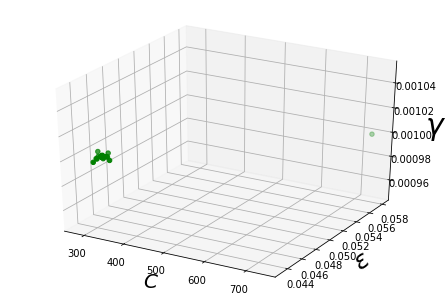






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 776.353467

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 777.069224

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 776.588895

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 776.810498

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 776.582440

Best Configuration Found:

SVR(C=306.4634723574258, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.04465418029542633, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



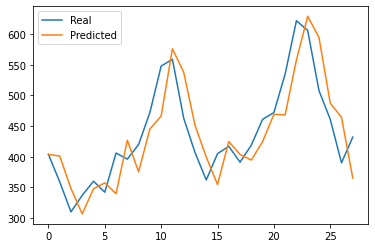


Ensemble Model series` predicitions:



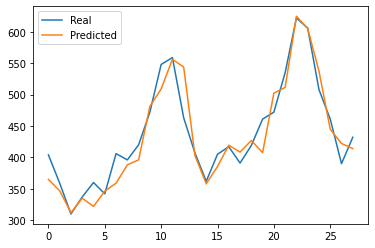


Ensemble Model best Average series` predicitions:



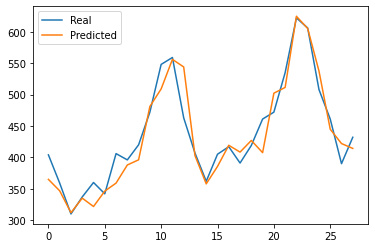


Ensemble Model K best Average series` predicitions:



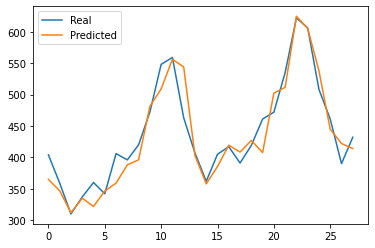


Ensemble Model best Median series` predicitions:



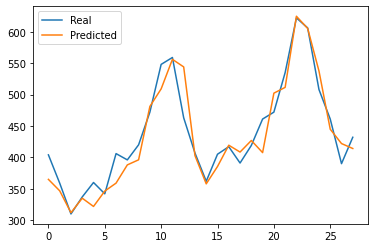


Ensemble Model K best Median series` predicitions:



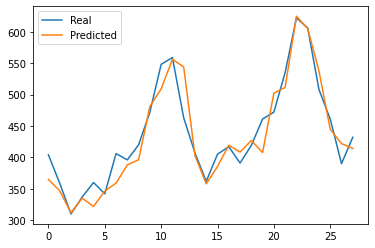






Best Result: Experiment # 1 . Mean Squared Error = 776.353467



In [32]:
pso(120, 100, 3, 0.2, 50, 30)

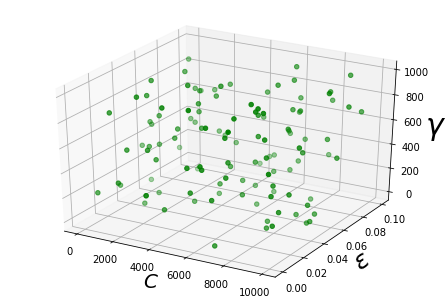






Experiment # 1: done. MSE_g_Best: 793.307035; MSE_AV: 793.998293; MSE_MD: 794.149052; MSE_k_AV: 793.319450; MSE_k_MD: 793.750091


Experiment # 2: done. MSE_g_Best: 792.811759; MSE_AV: 793.848277; MSE_MD: 793.885096; MSE_k_AV: 793.445649; MSE_k_MD: 793.472401


Experiment # 3: done. MSE_g_Best: 875.637243; MSE_AV: 876.253735; MSE_MD: 876.194638; MSE_k_AV: 875.504557; MSE_k_MD: 875.681072


Experiment # 4: done. MSE_g_Best: 794.134831; MSE_AV: 794.163374; MSE_MD: 794.167892; MSE_k_AV: 793.419293; MSE_k_MD: 793.802319


Experiment # 5: done. MSE_g_Best: 776.518876; MSE_AV: 777.223821; MSE_MD: 776.938145; MSE_k_AV: 776.634320; MSE_k_MD: 776.589062


Experiment # 6: done. MSE_g_Best: 792.703888; MSE_AV: 792.423332; MSE_MD: 792.562697; MSE_k_AV: 791.802831; MSE_k_MD: 792.271949


Experiment # 7: done. MSE_g_Best: 792.862225; MSE_AV: 794.331797; MSE_MD: 794.244935; MSE_k_AV: 793.639365; MSE_k_MD: 793.746243


Experiment # 8: done. MSE_g_Best: 792.587259; MSE_AV: 793.597558; MSE_MD: 793.

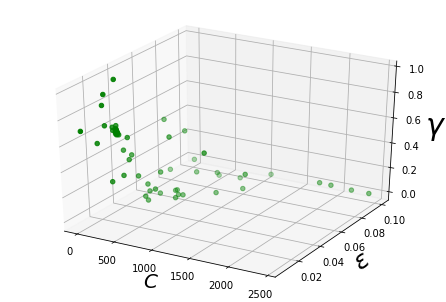






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 685.881721

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 679.870868

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 686.405505

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 686.308476

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 686.448981

Best Configuration Found:

SVR(C=1.0150134484008715, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.03396950029715446, gamma=0.5616891713170088, kernel='rbf',
    max_iter=-1, shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



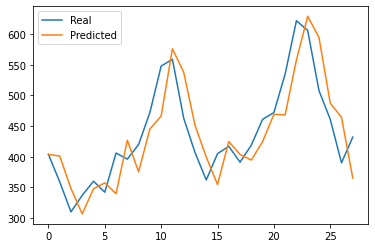


Ensemble Model series` predicitions:



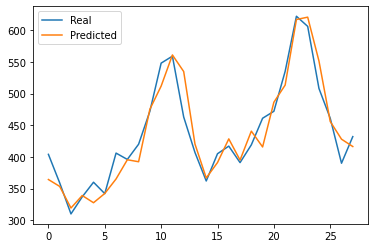


Ensemble Model best Average series` predicitions:



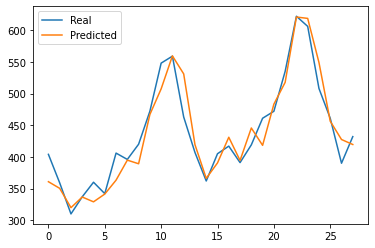


Ensemble Model K best Average series` predicitions:



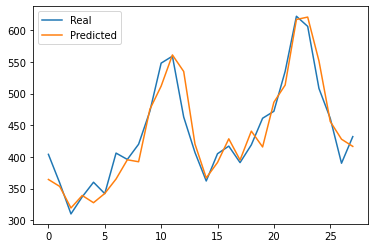


Ensemble Model best Median series` predicitions:



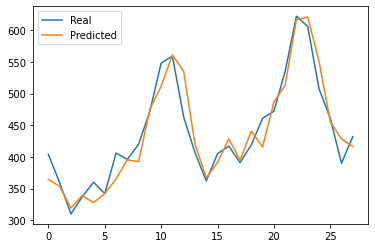


Ensemble Model K best Median series` predicitions:



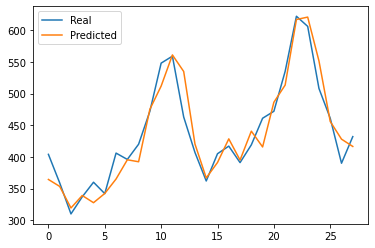






Best Result: Experiment # 29 . Mean Squared Error = 685.881721



In [33]:
pso(120, 100, 3, 0.2, 60, 30)